# Clustering Assignment

**Overview**

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. 

Here, we need to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

The steps are broadly:

1. Read and Understand the Data
2. Preparing the Dataset
3. Performing EDA
4. Treating Outliers
5. Rescaling Dataset
6. Hopkins Check
7. K-means Clustering
8. Hierarchical Clustering
9. Final Conclusion

## 1. Reading and Understanding Data

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### 1.1. Reading Dataset

In [2]:
# read the dataset
ctr_df = pd.read_csv("Country-data.csv")
ctr_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### 1.2. Understanding Dataset

In [3]:
# basics of the dataframe
ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# columns of the dataframe
ctr_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [5]:
# Checking Important Parameters
ctr_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Checking The Null Values
ctr_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values in the dataset.

In [7]:
# Converting country column into index
ctr_df.set_index('country',inplace=True)
ctr_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Country column is converted into index to facilite easy analysis of data.

## 2. Preparing Dataset

To identify top countries that are in direst need of aid. We need to categorise the countries using socio-economic and health factors that determine the overall development of the country. Changing the column of 'health', 'imports' and 'exports' percentage of Total GDP into 'health', 'imports' and 'exports' percentage of total gdpp for making dataset complete sense.

In [8]:
# Now changing per Total GDP to per Total GDPP

ctr_df['health']=(ctr_df['health']*ctr_df['gdpp'])/100
ctr_df['imports']=(ctr_df['imports']*ctr_df['gdpp'])/100
ctr_df['exports']=(ctr_df['exports']*ctr_df['gdpp'])/100
ctr_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
# Reviewing database after making few changs
ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


# 3. Performing EDA

### 3.1. Visualising Univariate Analysis

Text(0.5, 0, 'child_mort')

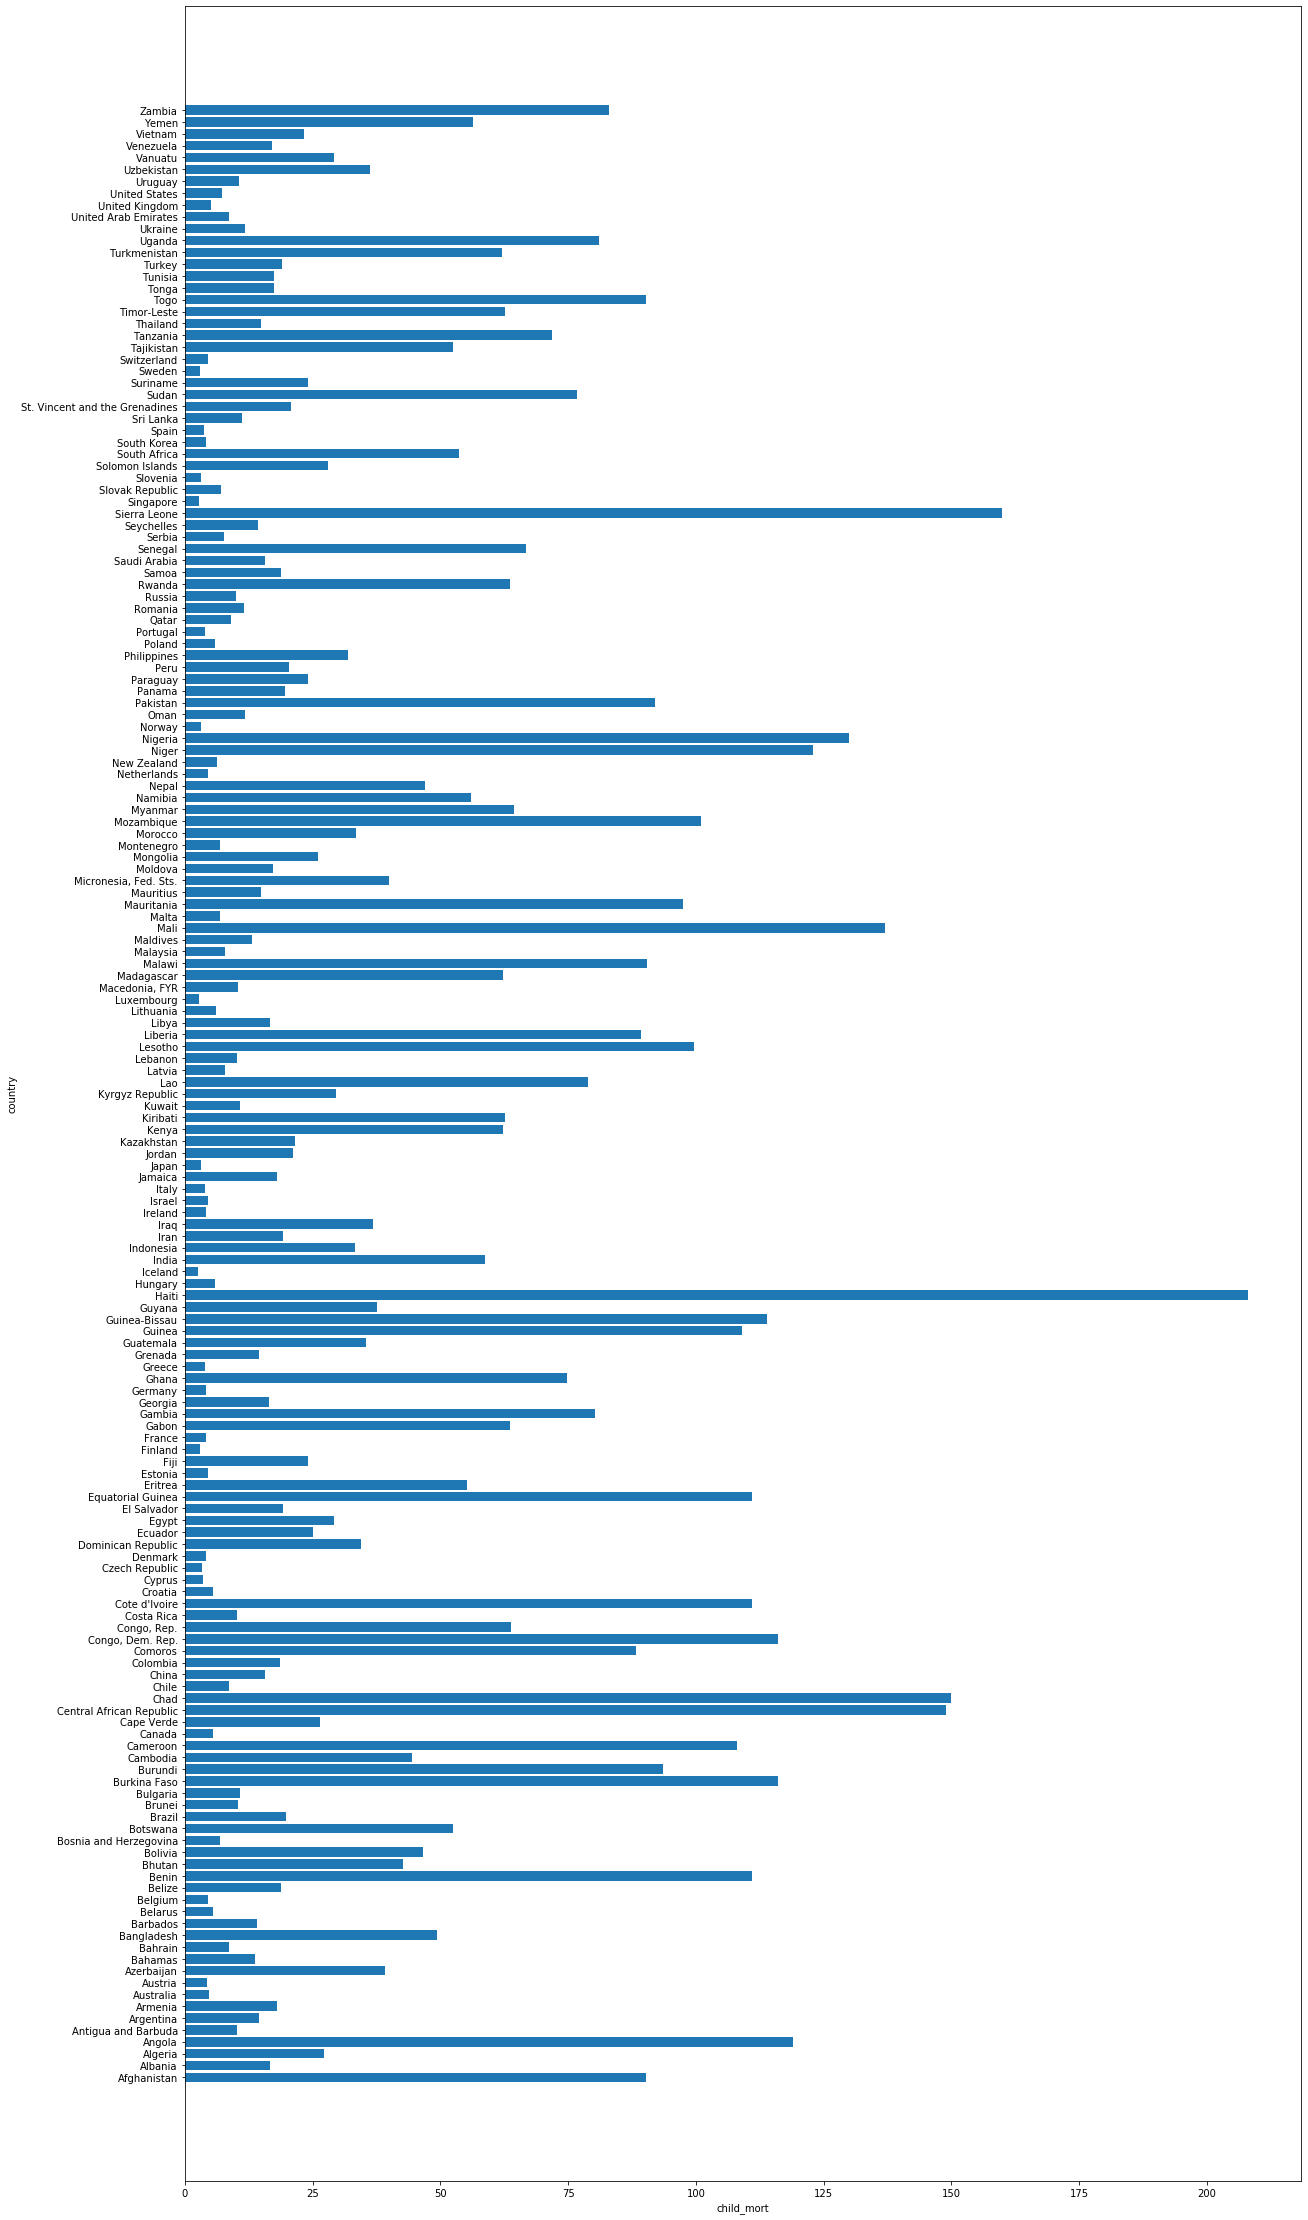

In [10]:
# Visualizing child mortality in all countries
plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.child_mort)
plt.ylabel('country')
plt.xlabel('child_mort')

Hati, Serra Leone, Chad, Central African Republic and Mali have highest Child Mortality. 

Text(0.5, 0, 'exports')

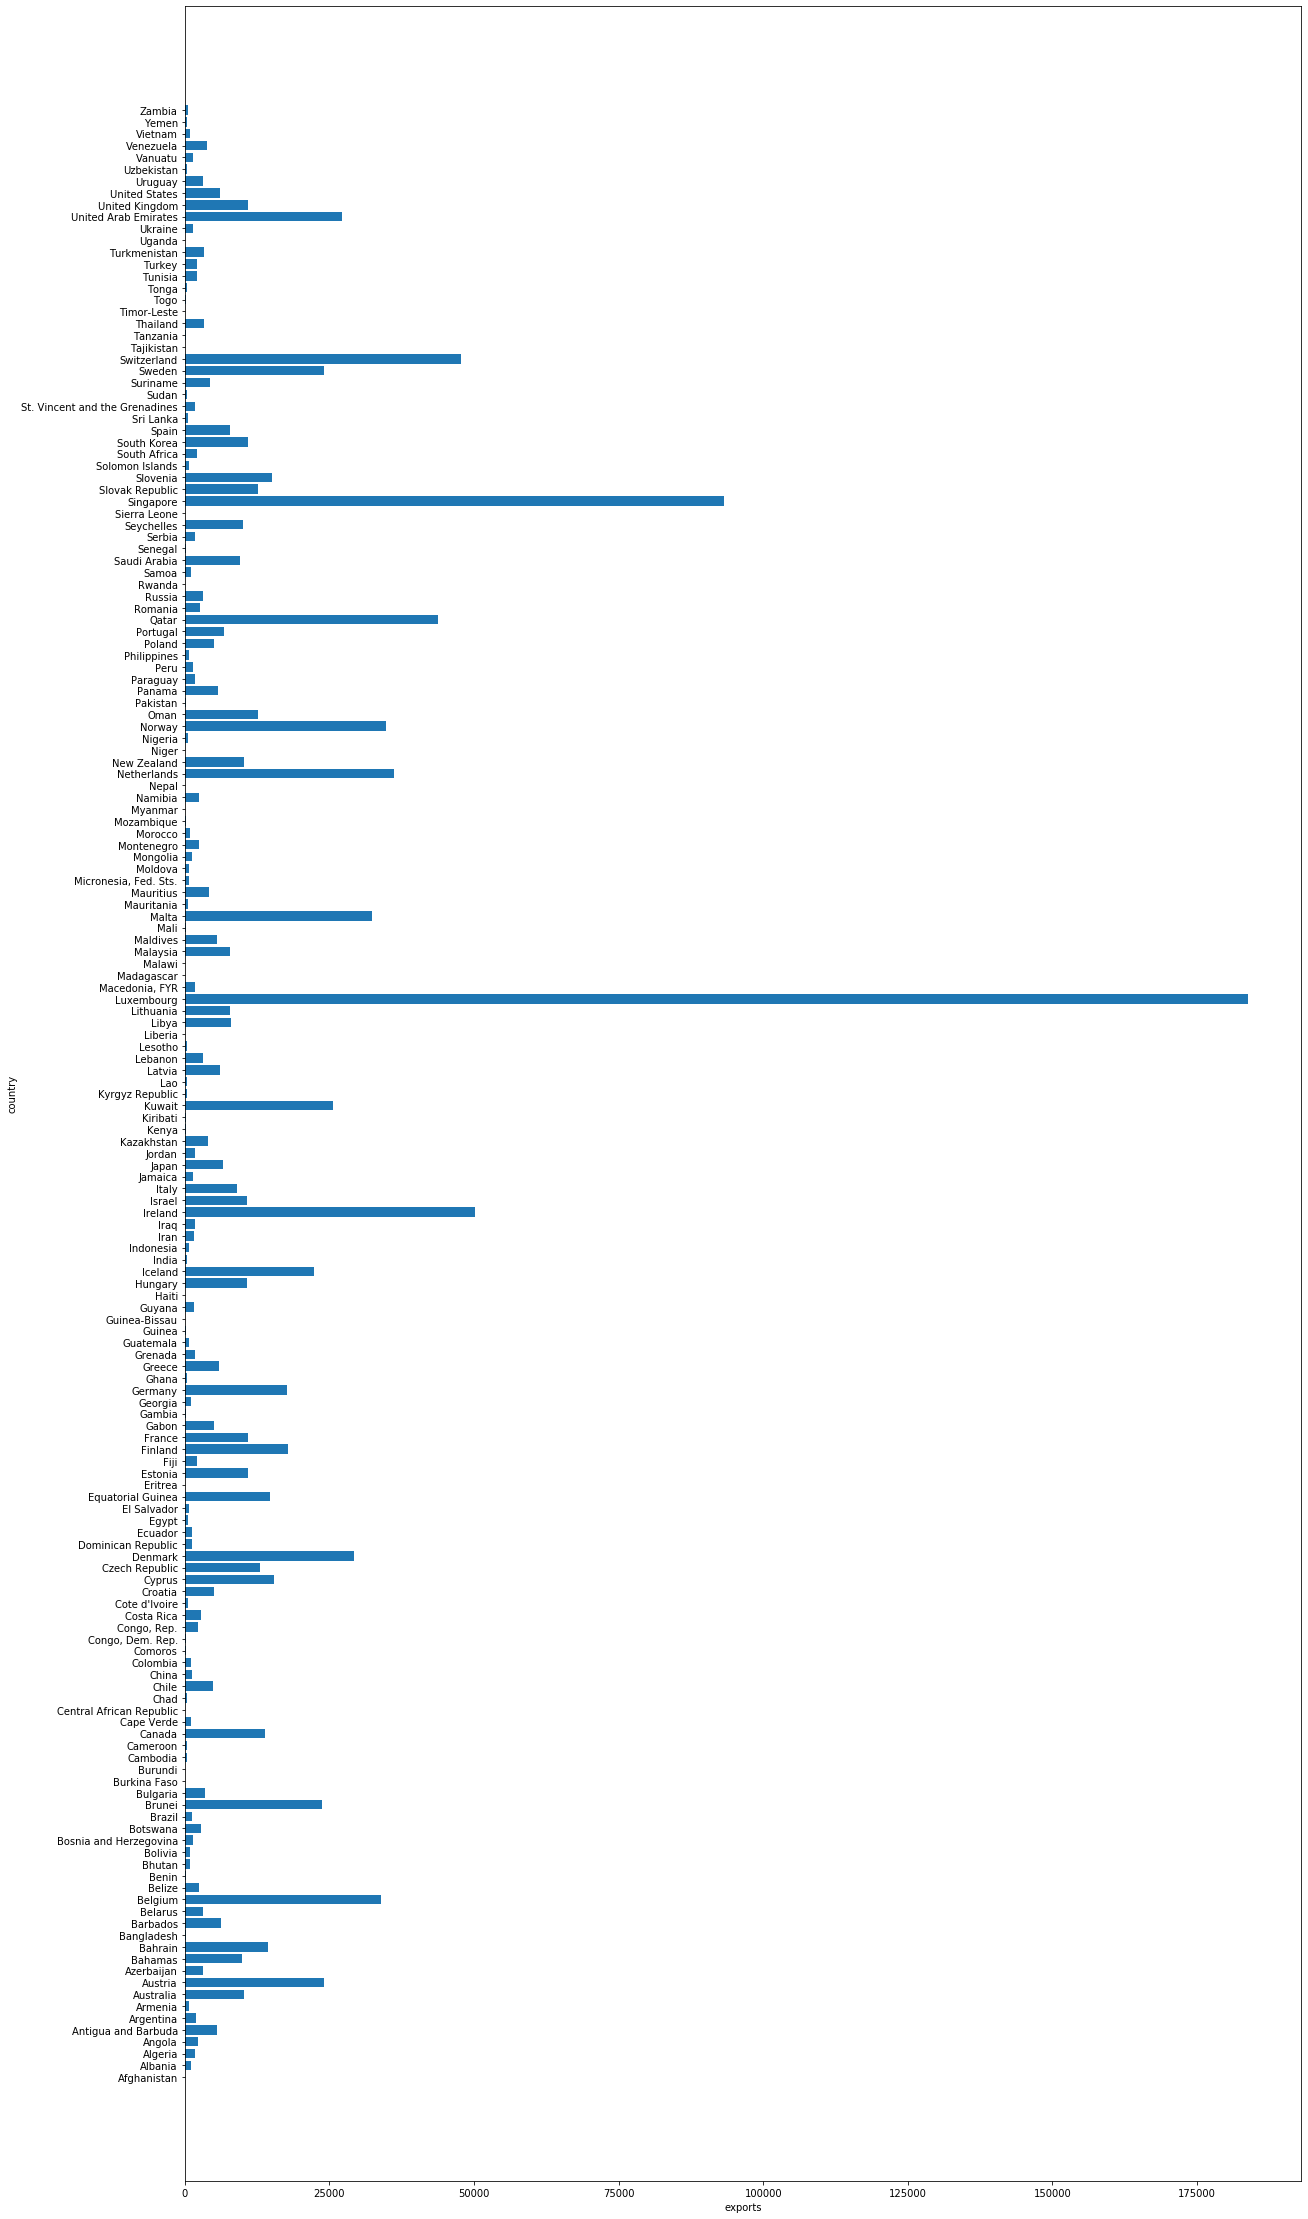

In [11]:
# Visualizing exports of goods and services per capita of all countries
plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.exports)
plt.ylabel('country')
plt.xlabel('exports')

Luxembourg, Singapore, Irland, Switzerland and Qatar have highest exports.

Text(0.5, 0, 'health')

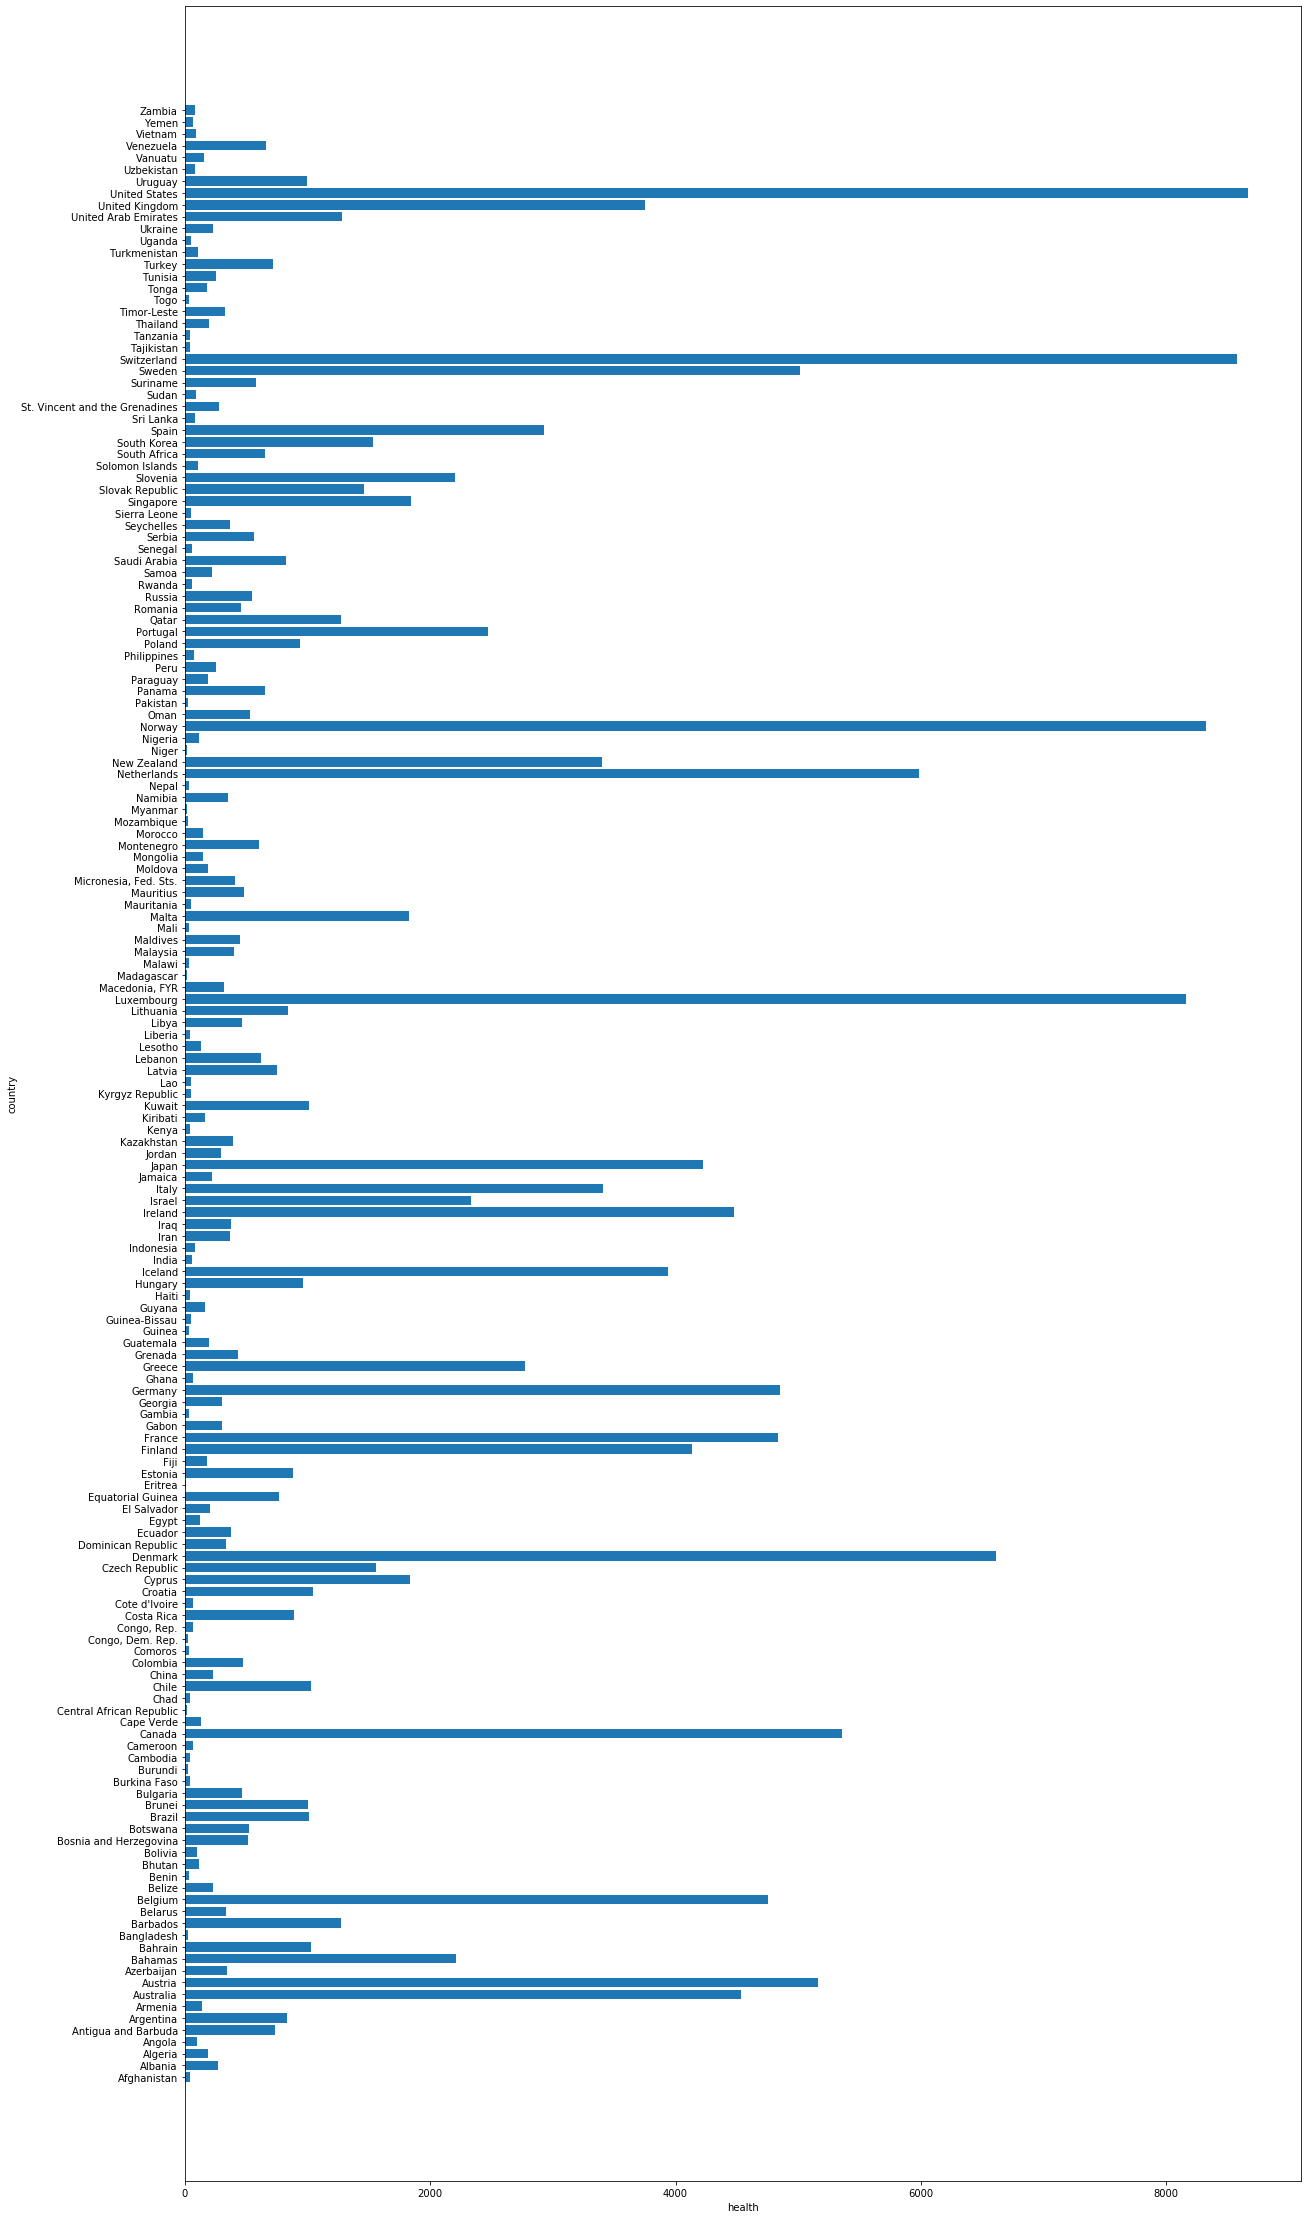

In [12]:
# Visualizing total health spending per capita of all countries
plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.health)
plt.ylabel('country')
plt.xlabel('health')

Spending on healthcare is higher in US, Switzerland, Norway, Luxembourg and Denmark

Text(0.5, 0, 'imports')

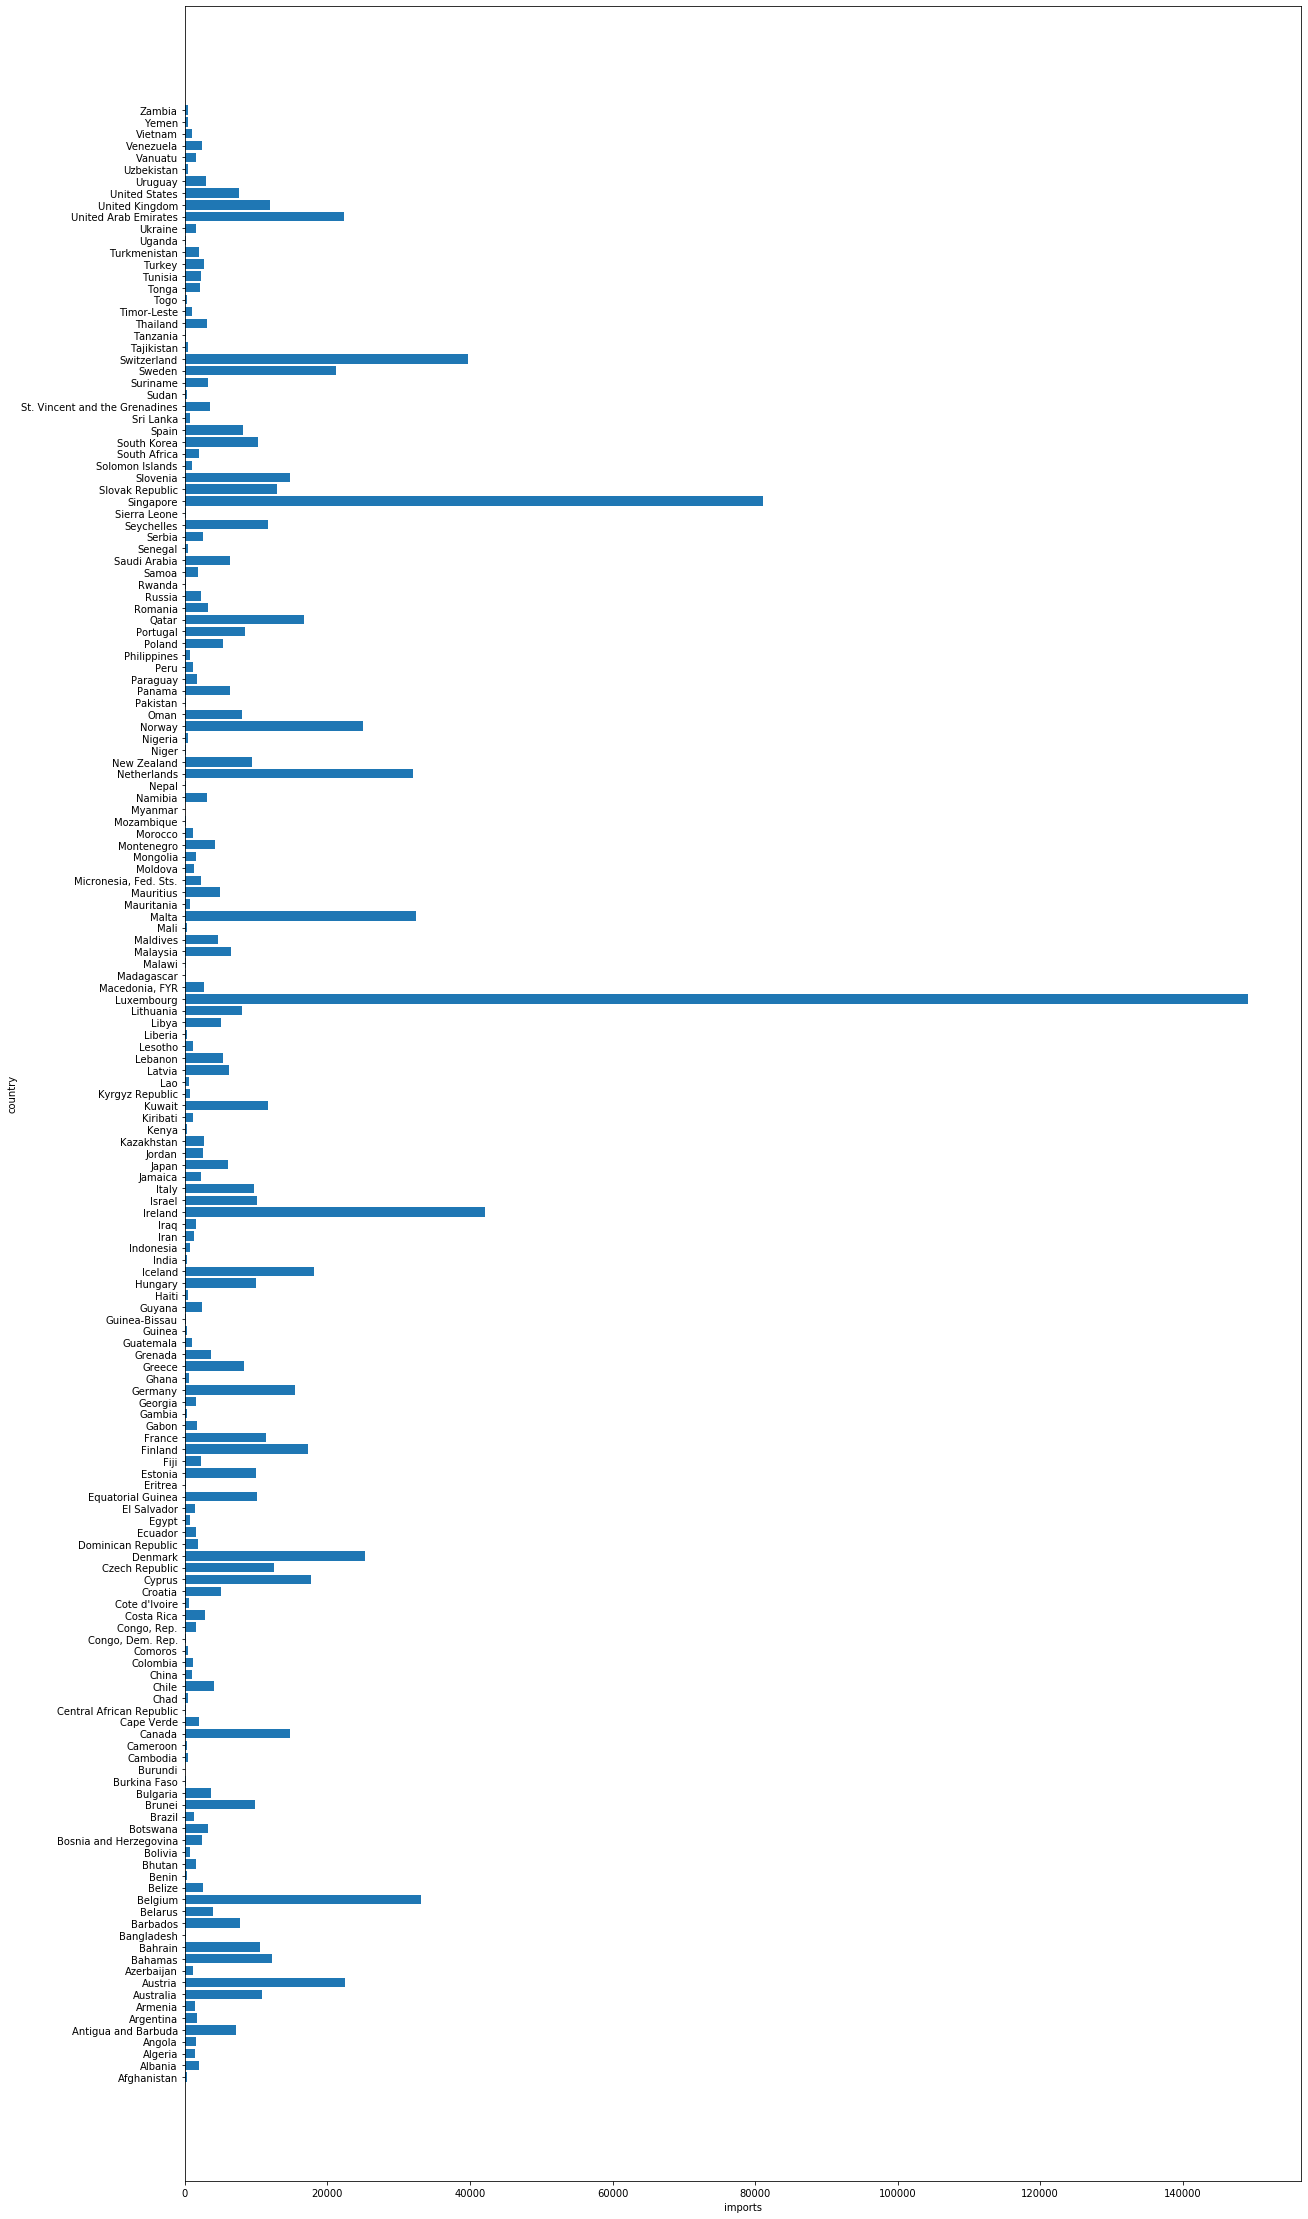

In [13]:
# Visualizing imports of goods and services per capita of all countries

plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.imports)
plt.ylabel('country')
plt.xlabel('imports')

Text(0.5, 0, 'income')

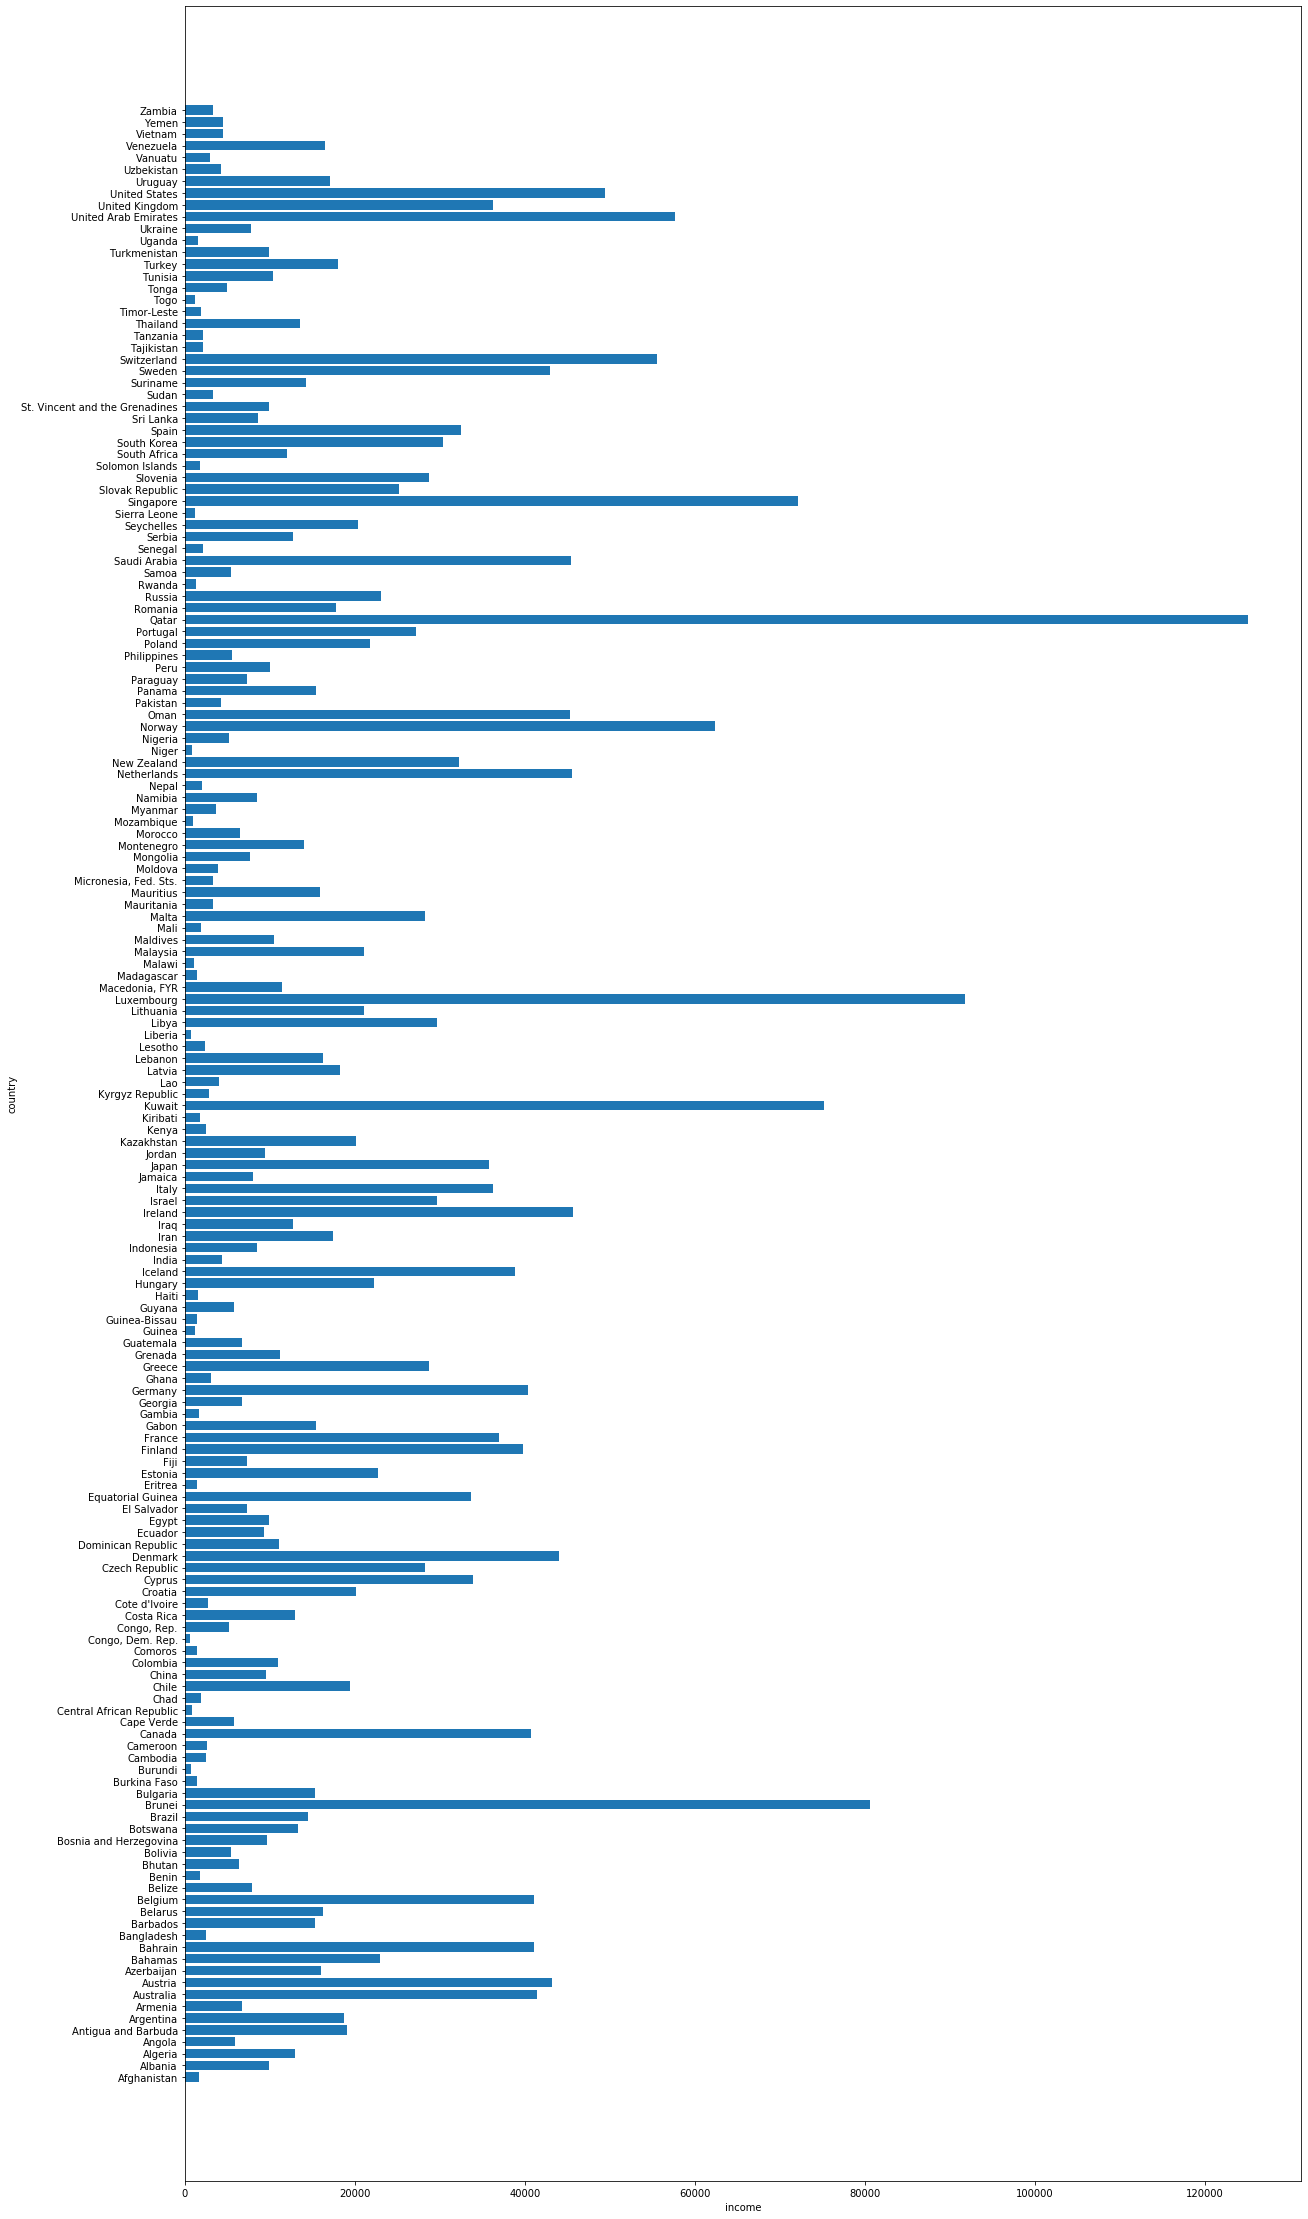

In [14]:
# Visualizing Net income per person of all countries

plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.income)
plt.ylabel('country')
plt.xlabel('income')

Qatar, Luxembourg, Brunei, Kuwait and Singapore have highest income.

Text(0.5, 0, 'inflation')

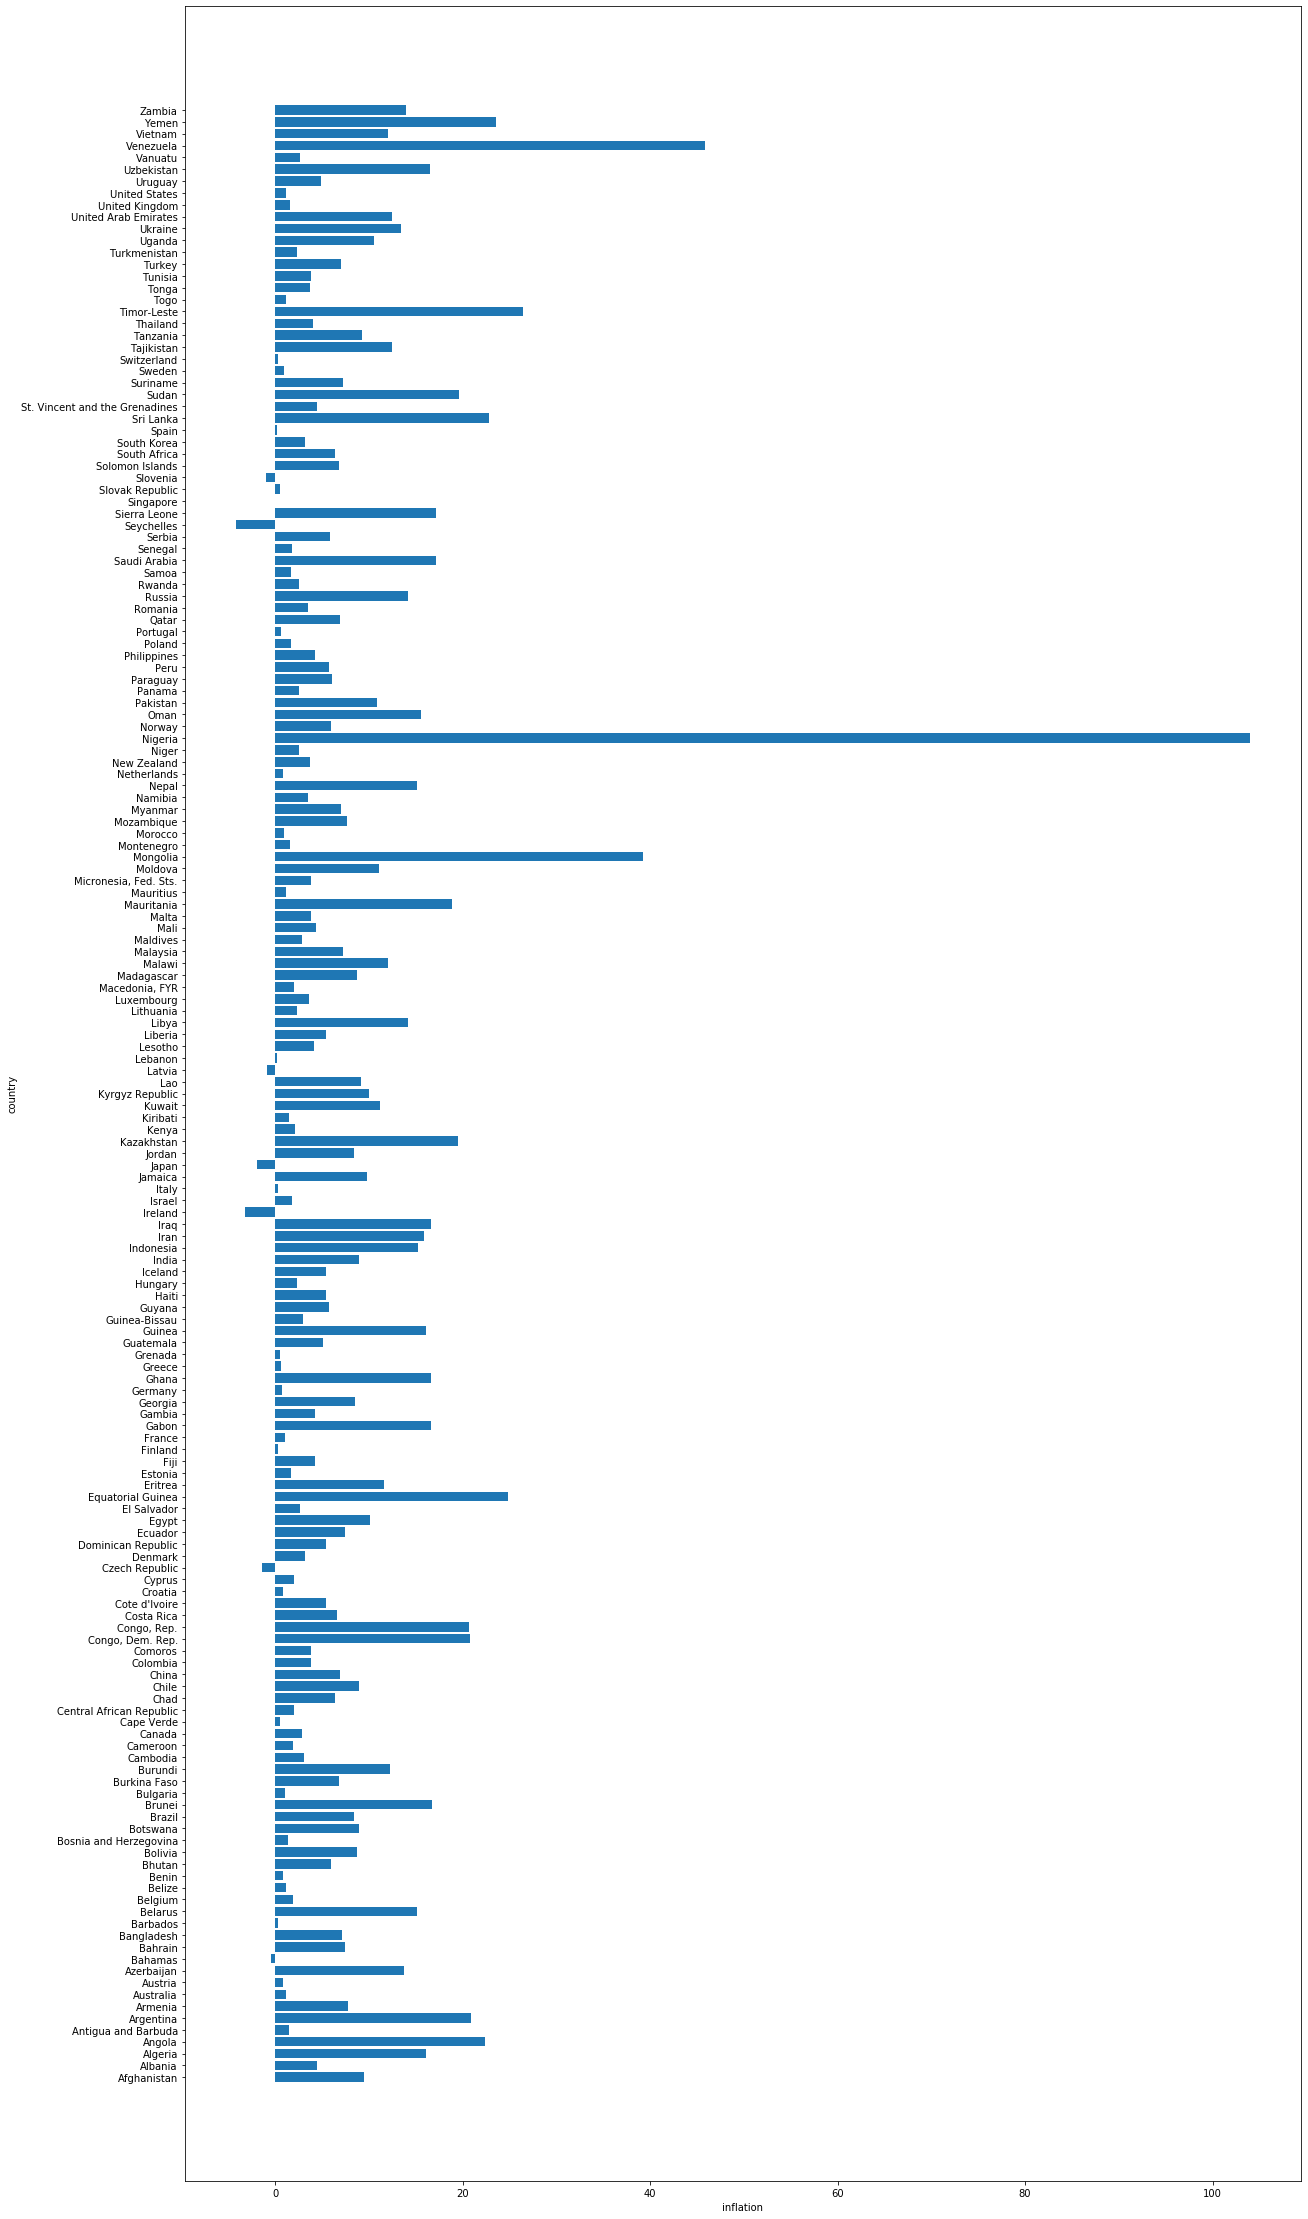

In [15]:
# Visualizing inflation of all countries

plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.inflation)
plt.ylabel('country')
plt.xlabel('inflation')

Nigeria, Mangolia, Venezuela, ecuador guinea and timor leste have highest inflation.

Text(0.5, 0, 'life_expec')

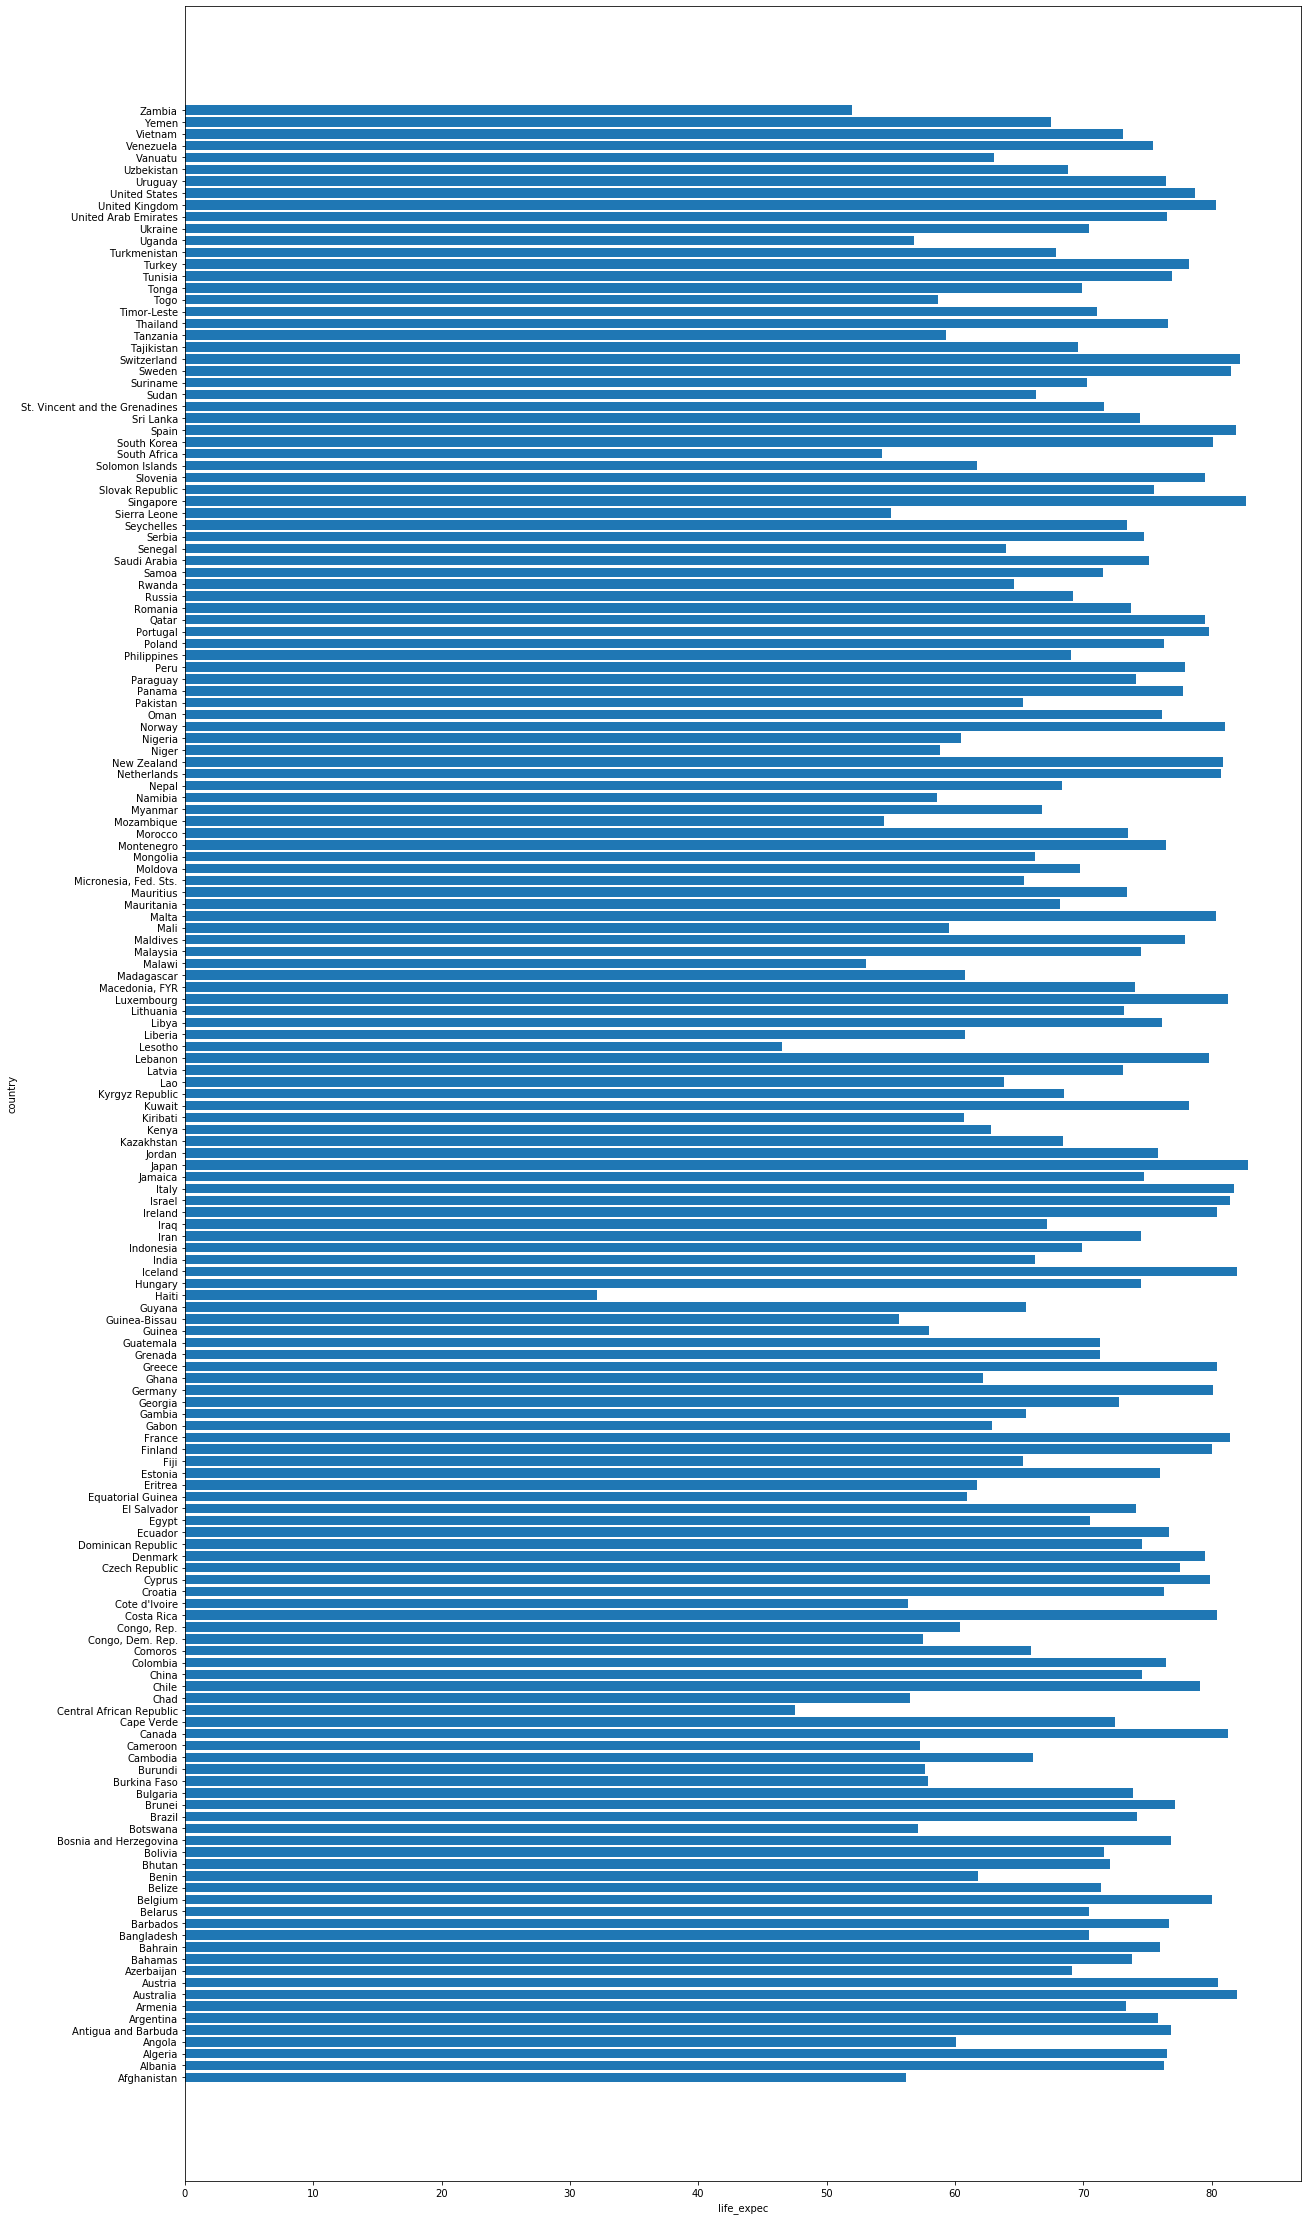

In [16]:
# Visualizing life expectancy of all countries

plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.life_expec)
plt.ylabel('country')
plt.xlabel('life_expec')

Japan, Singapore, Australia, Iceland and Switzerland have highest life expetancy rate.

Text(0.5, 0, 'total_fer')

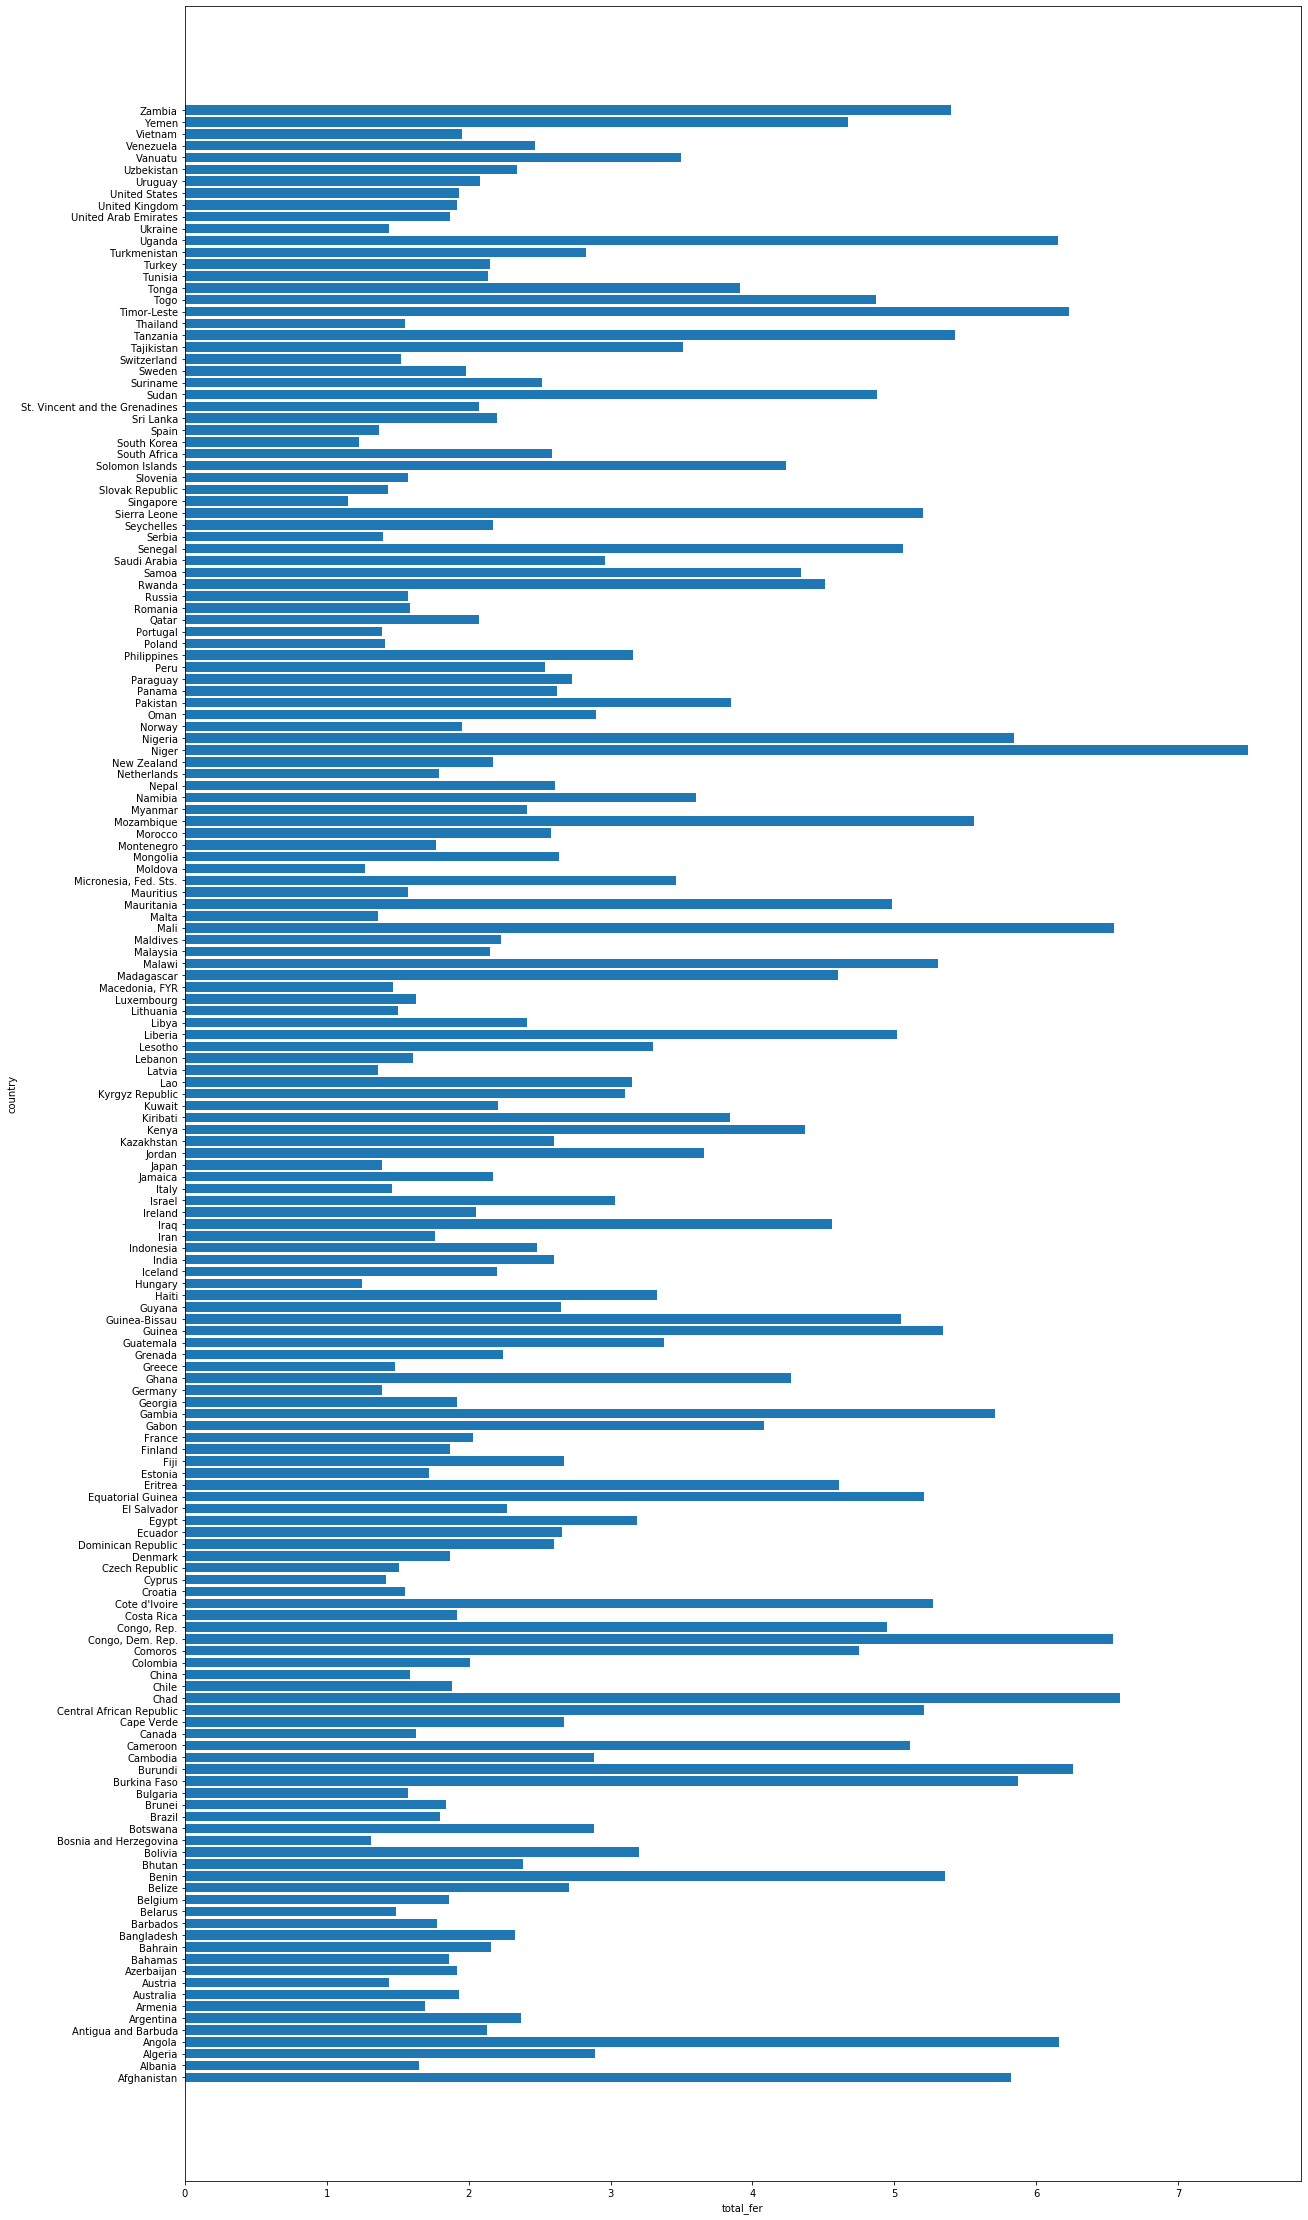

In [17]:
# Visualizing total fertility rate of all countries

plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.total_fer)
plt.ylabel('country')
plt.xlabel('total_fer')

Niger, Chad, Mali, Congo and Burundi have highest fertility rate.

Text(0.5, 0, 'gdpp')

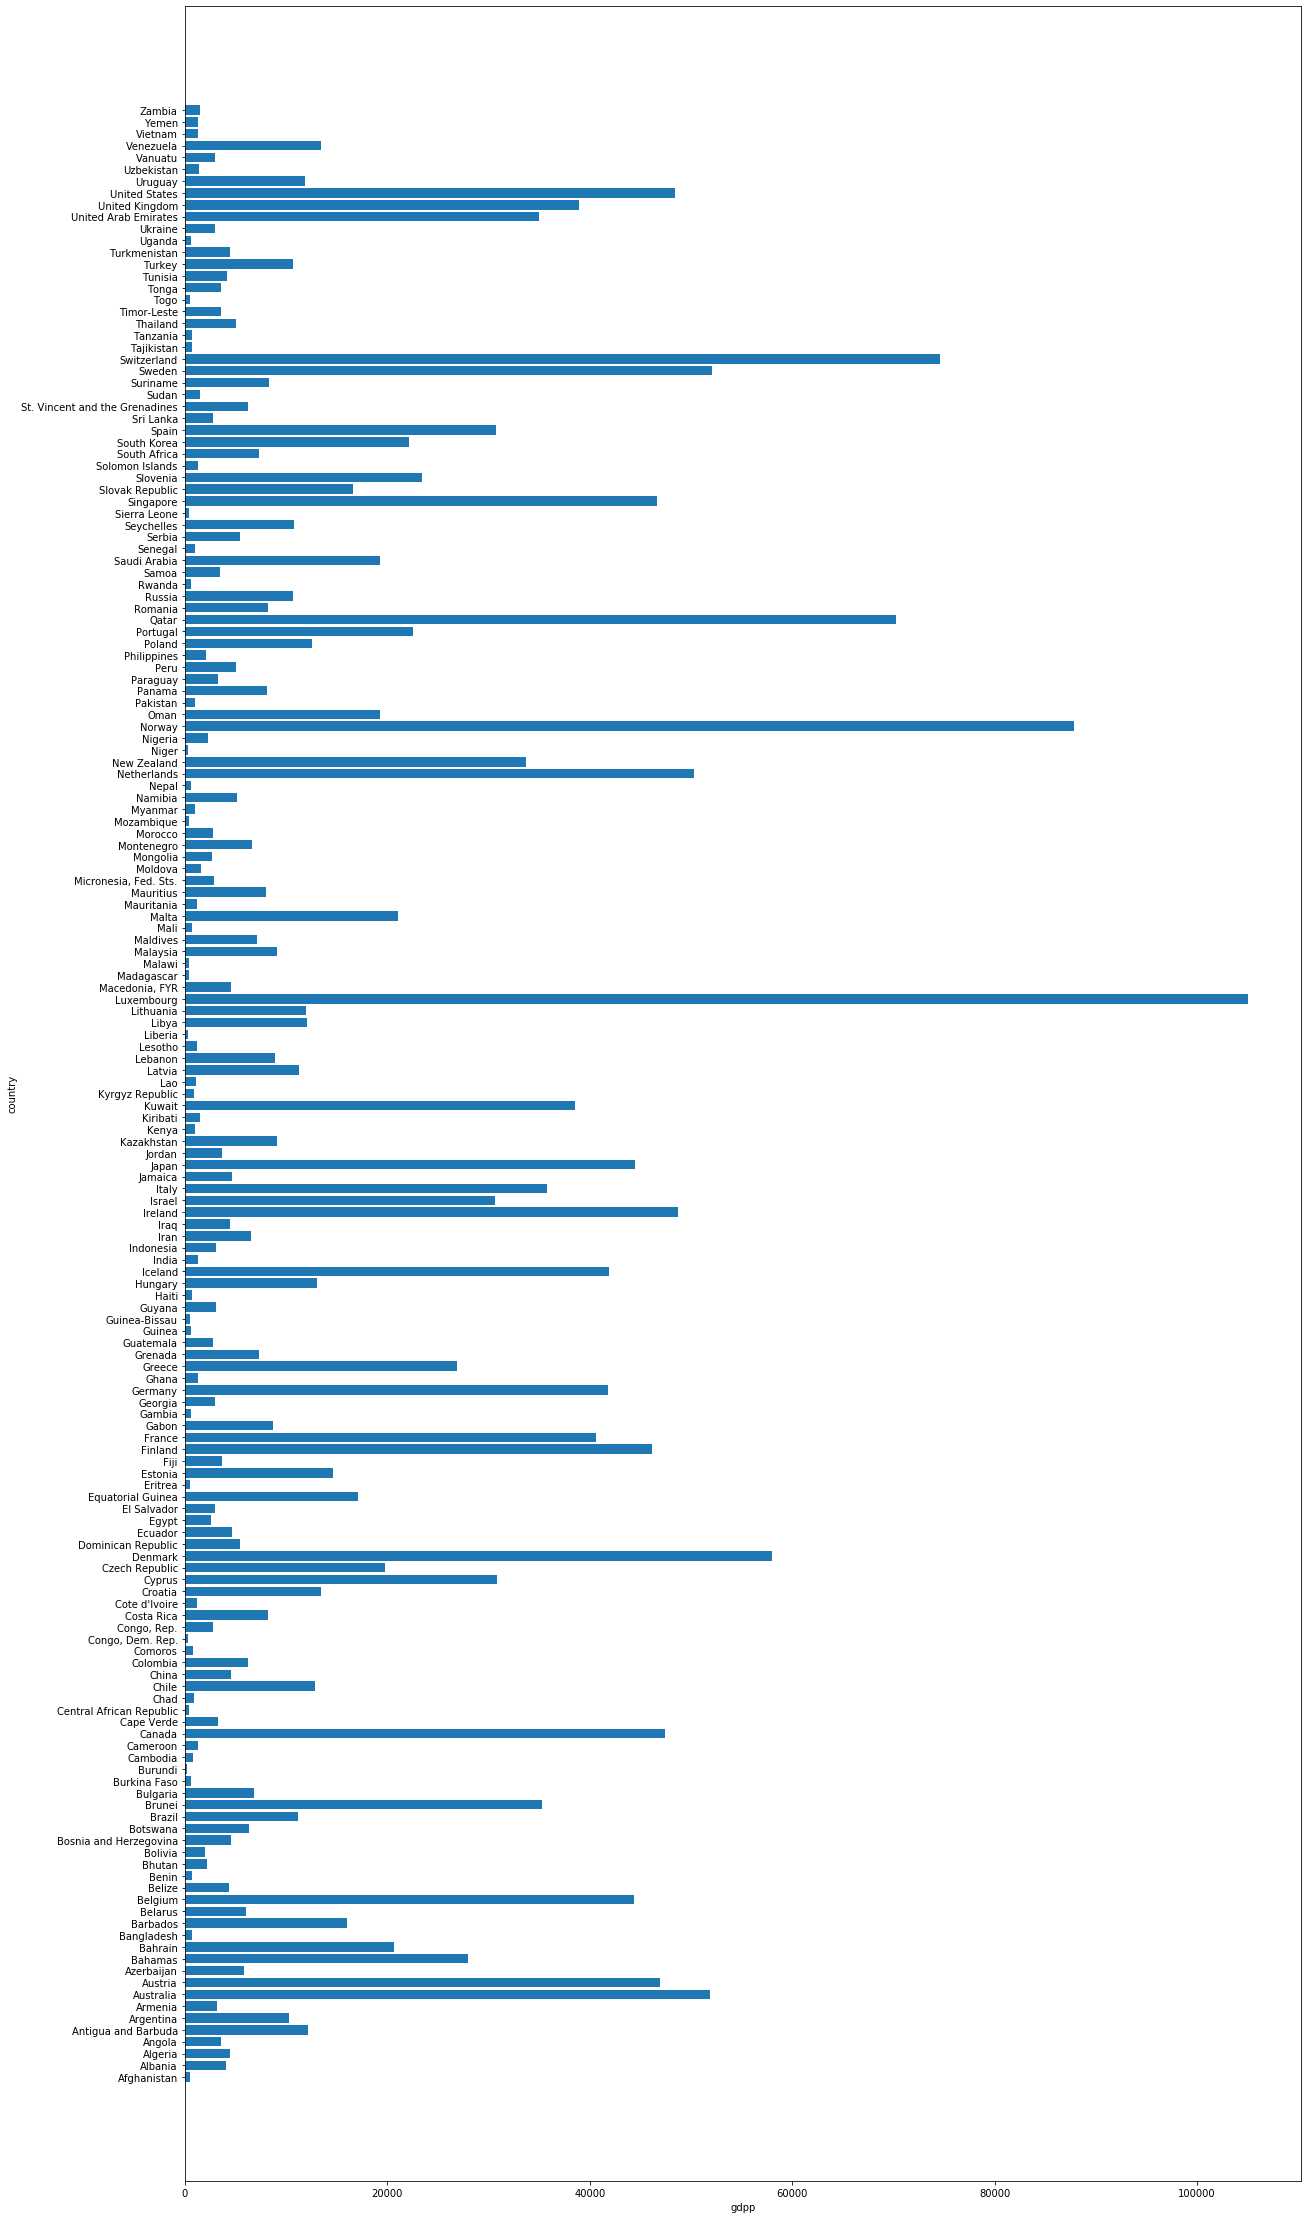

In [18]:
# Visualizing GDP per capita of all countries
plt.figure(figsize=(20,40))
plt.barh(ctr_df.index,ctr_df.gdpp)
plt.ylabel('country')
plt.xlabel('gdpp')

Qatar, Luxembourg, Norway, Switzerland and Denmark have highes GDP per capita.

### 3.2. Visualising Multi-variate Analysis

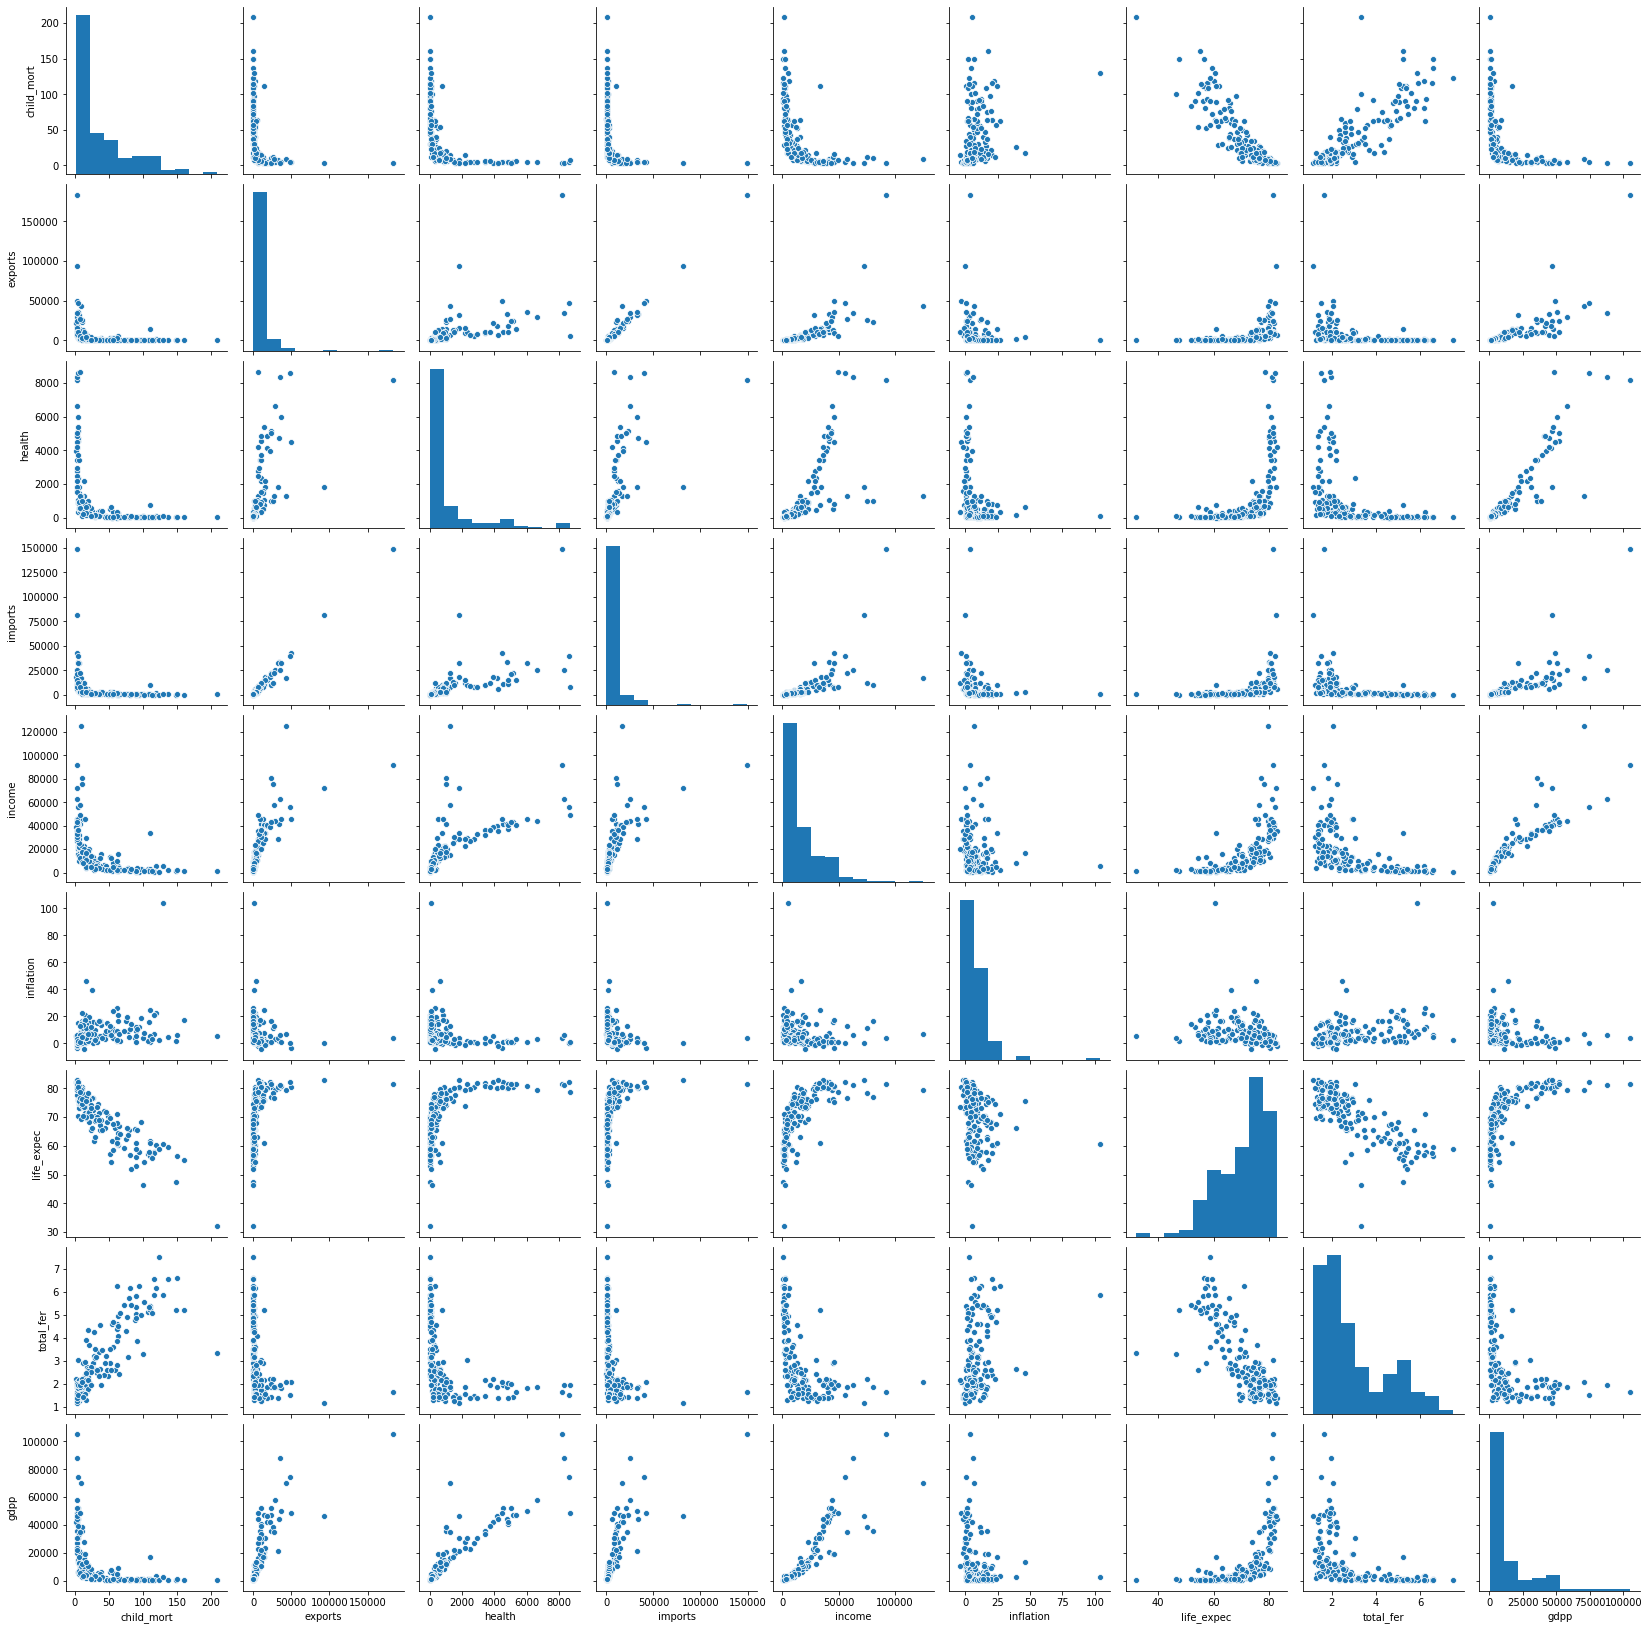

In [19]:
# multivariate analysis of all columns
sns.pairplot(ctr_df)

A lot of columns are highly correlated with each other.

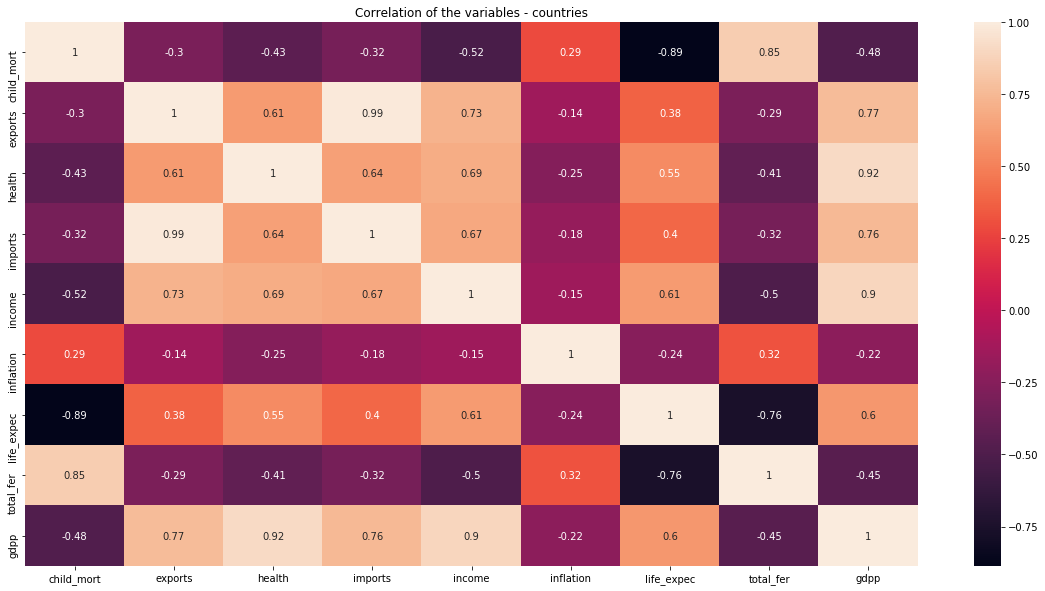

In [20]:
# correlation heatmap of all columns
%matplotlib inline 
plt.figure(figsize=(20,10))
plt.title("Correlation of the variables - countries")
sns.heatmap(ctr_df.corr(),annot=True)

plt.show()

From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

In [21]:
#correlation between all columns
cor = ctr_df.corr()
cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


## 4. Treating Outliers 

### 4.1. Outliers Analysis

In [22]:
# analysing percentile of outliers in each column
round(ctr_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2) 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,7420.62,1056.73,6588.35,17144.69,7.78,70.56,2.95,12964.16
std,40.33,17973.89,1801.41,14710.81,19278.07,10.57,8.89,1.51,18328.70
min,2.60,1.08,12.82,0.65,609.00,-4.21,32.10,1.15,231.00
15%,4.78,159.32,45.63,300.72,1924.00,0.99,60.37,1.55,767.90
35%,11.85,825.31,144.46,1209.68,5846.00,2.89,68.53,1.98,2870.00
50%,19.30,1777.44,321.89,2045.58,9960.00,5.39,73.10,2.41,4660.00
55%,24.10,2187.72,376.45,2384.59,12700.00,5.96,73.93,2.60,6090.00
75%,62.10,7278.00,976.94,7719.60,22800.00,10.75,76.80,3.88,14050.00
95%,116.00,31385.10,4966.70,24241.56,48290.00,20.87,81.40,5.86,48610.00


As we can see from the above table, all columns are having outliers.

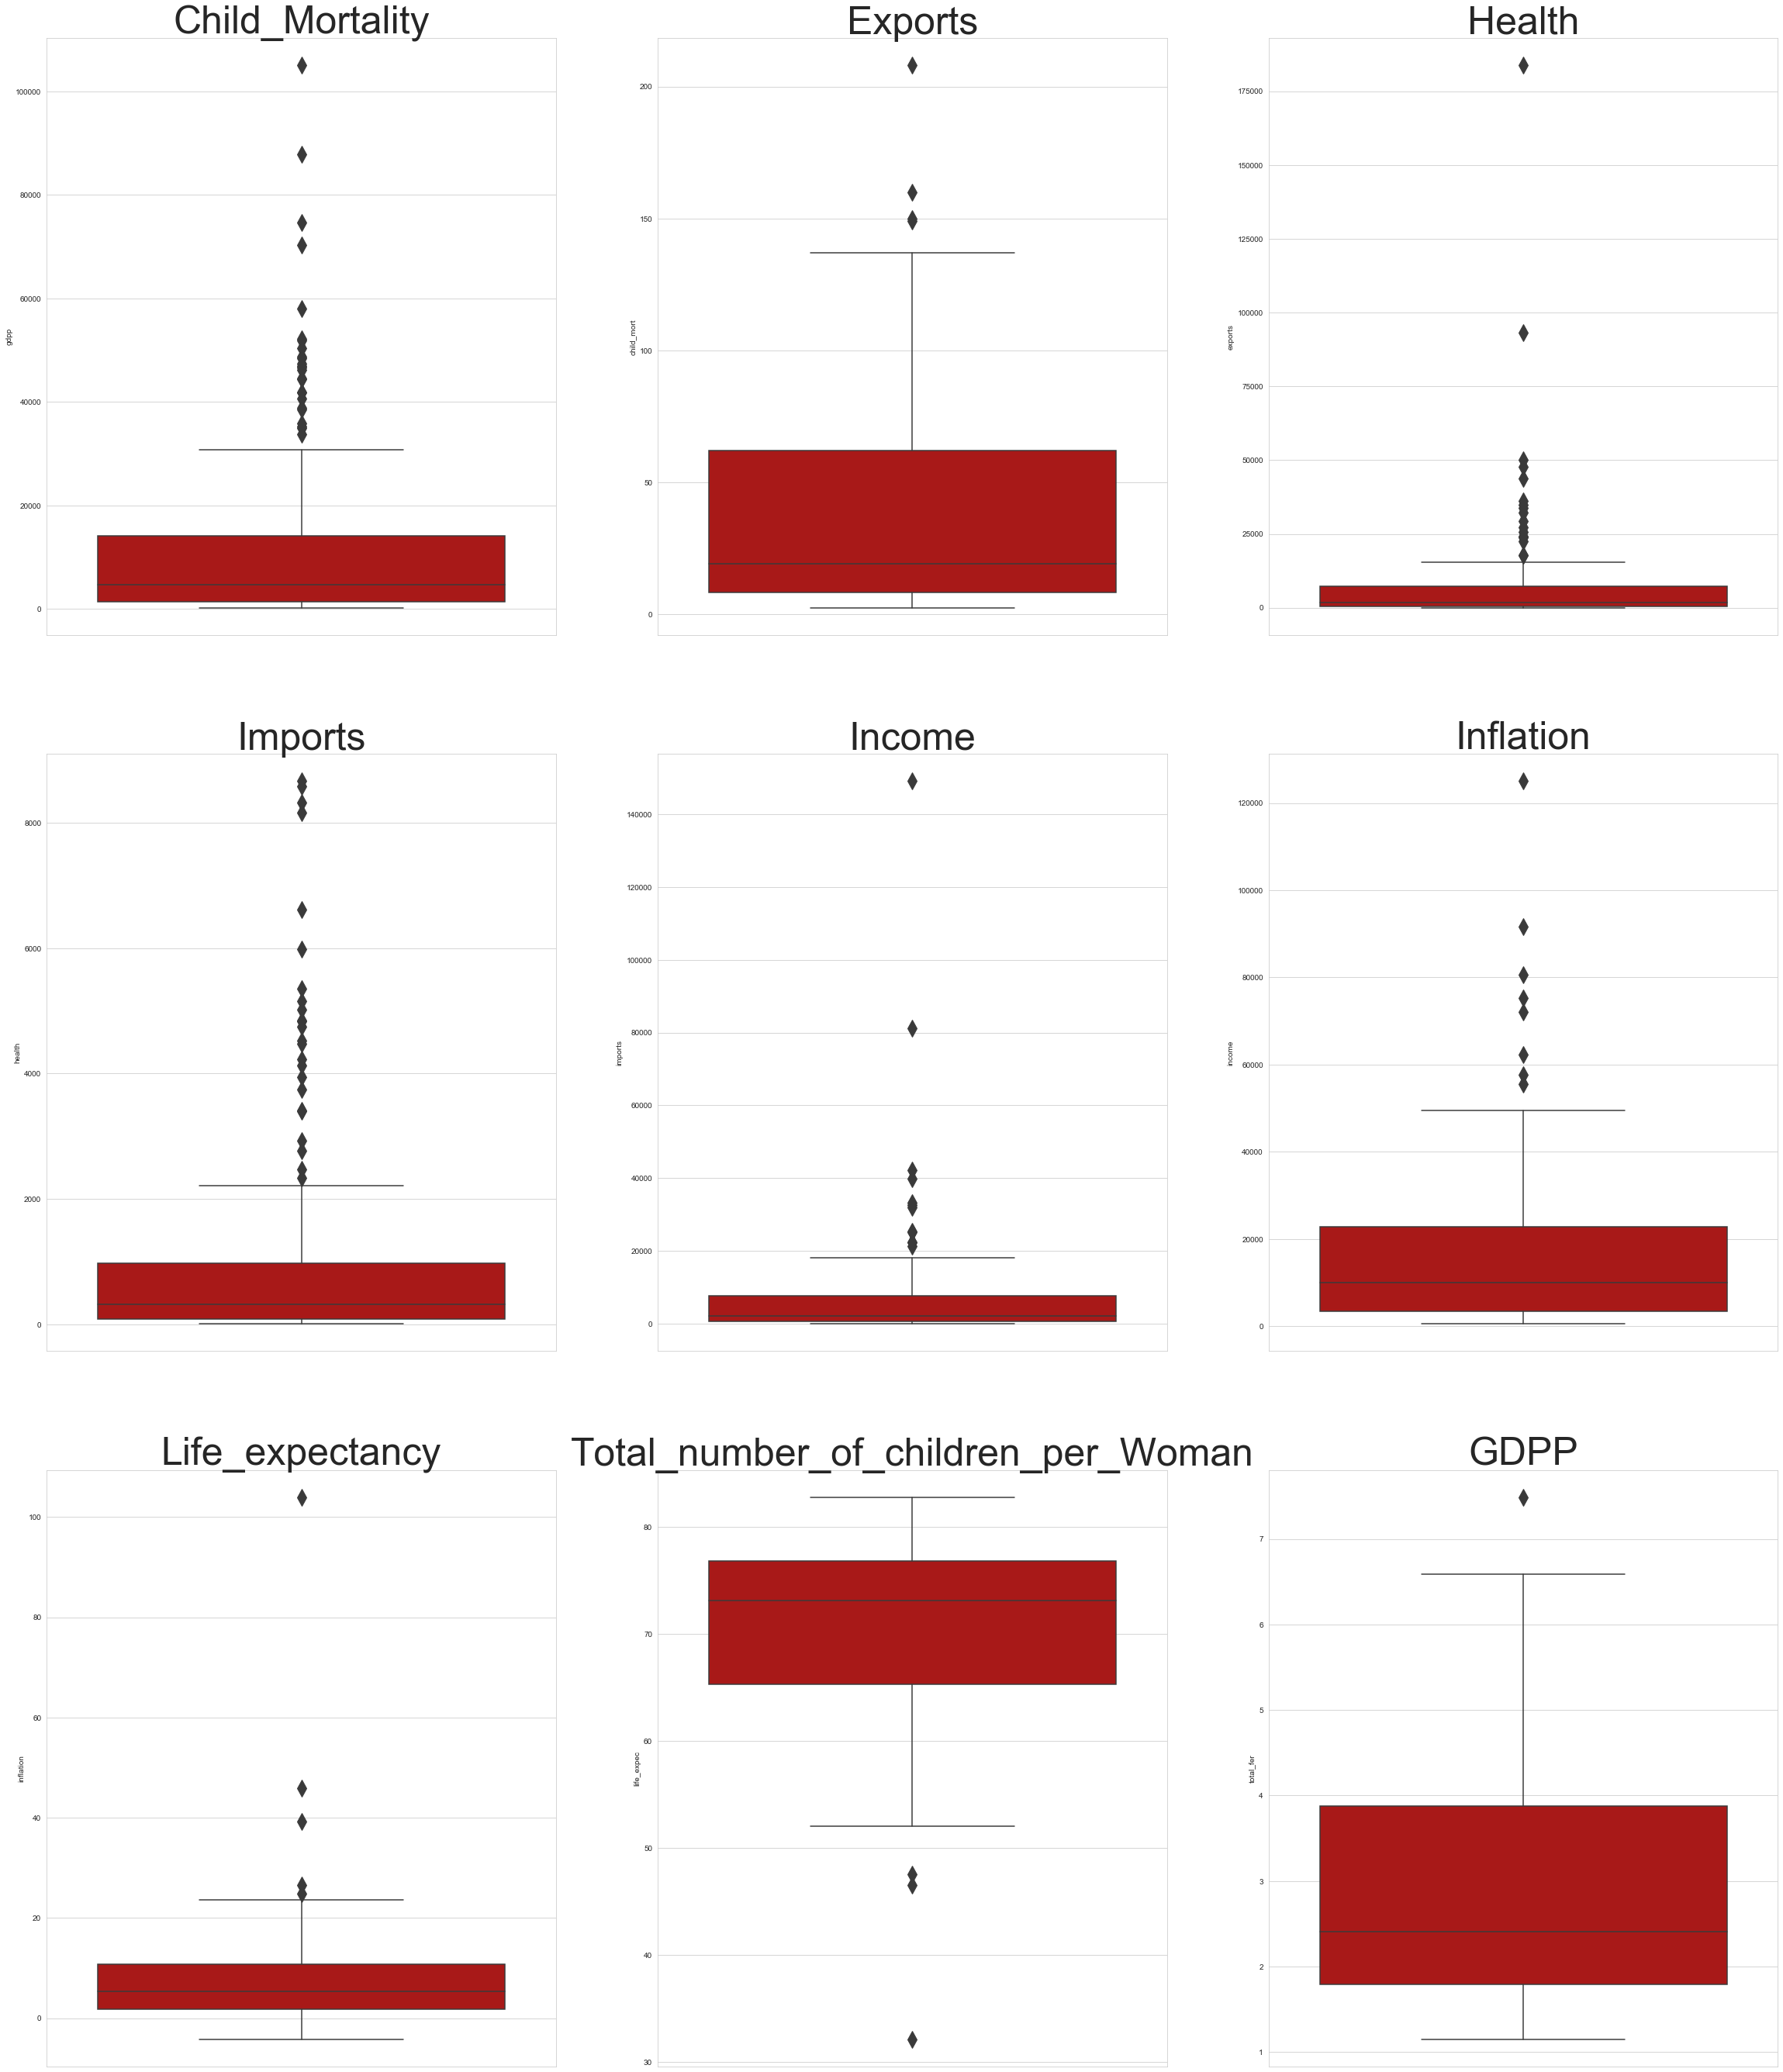

In [23]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(40,150))
plt.tight_layout()
sns.set_style('whitegrid')

# Title names for the columns in the dataset
col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}


# Visualising the outliers with boxplot for all the variables 
for i in range(9):
   plt.subplot(9,3,i+1)
   plt.title(col[i],fontsize=50)
   sns.boxplot(x=ctr_df.columns[i-1],data=ctr_df,palette='gist_heat',orient='v',fliersize=15)

From the above boxplot, we can conclude that all the variables/components are having outliers. So, will be treating those outliers.

### 4.2. Outlier Treatment

In [24]:
def treat_outlier(col):

    q1,q3 = col.quantile([0.25,0.75])

    IQR = q3-q1

    lower_range = q1-(1.5*IQR)
     
    upper_range = q3 + (1.5*IQR)
    
    return lower_range, upper_range

In [25]:
def outlier_treated_df(dataframe):
    for i in dataframe.columns:

        if dataframe[i].dtype == 'float64' or dataframe[i].dtype == 'int64':

            lrincome,urincome=treat_outlier(dataframe[i])  # Calling treat_outlier function 
            dataframe[i]=np.where(dataframe[i]>urincome,urincome,dataframe[i])
            dataframe[i]=np.where(dataframe[i]<lrincome,lrincome,dataframe[i])

outlier_treated_df(ctr_df)

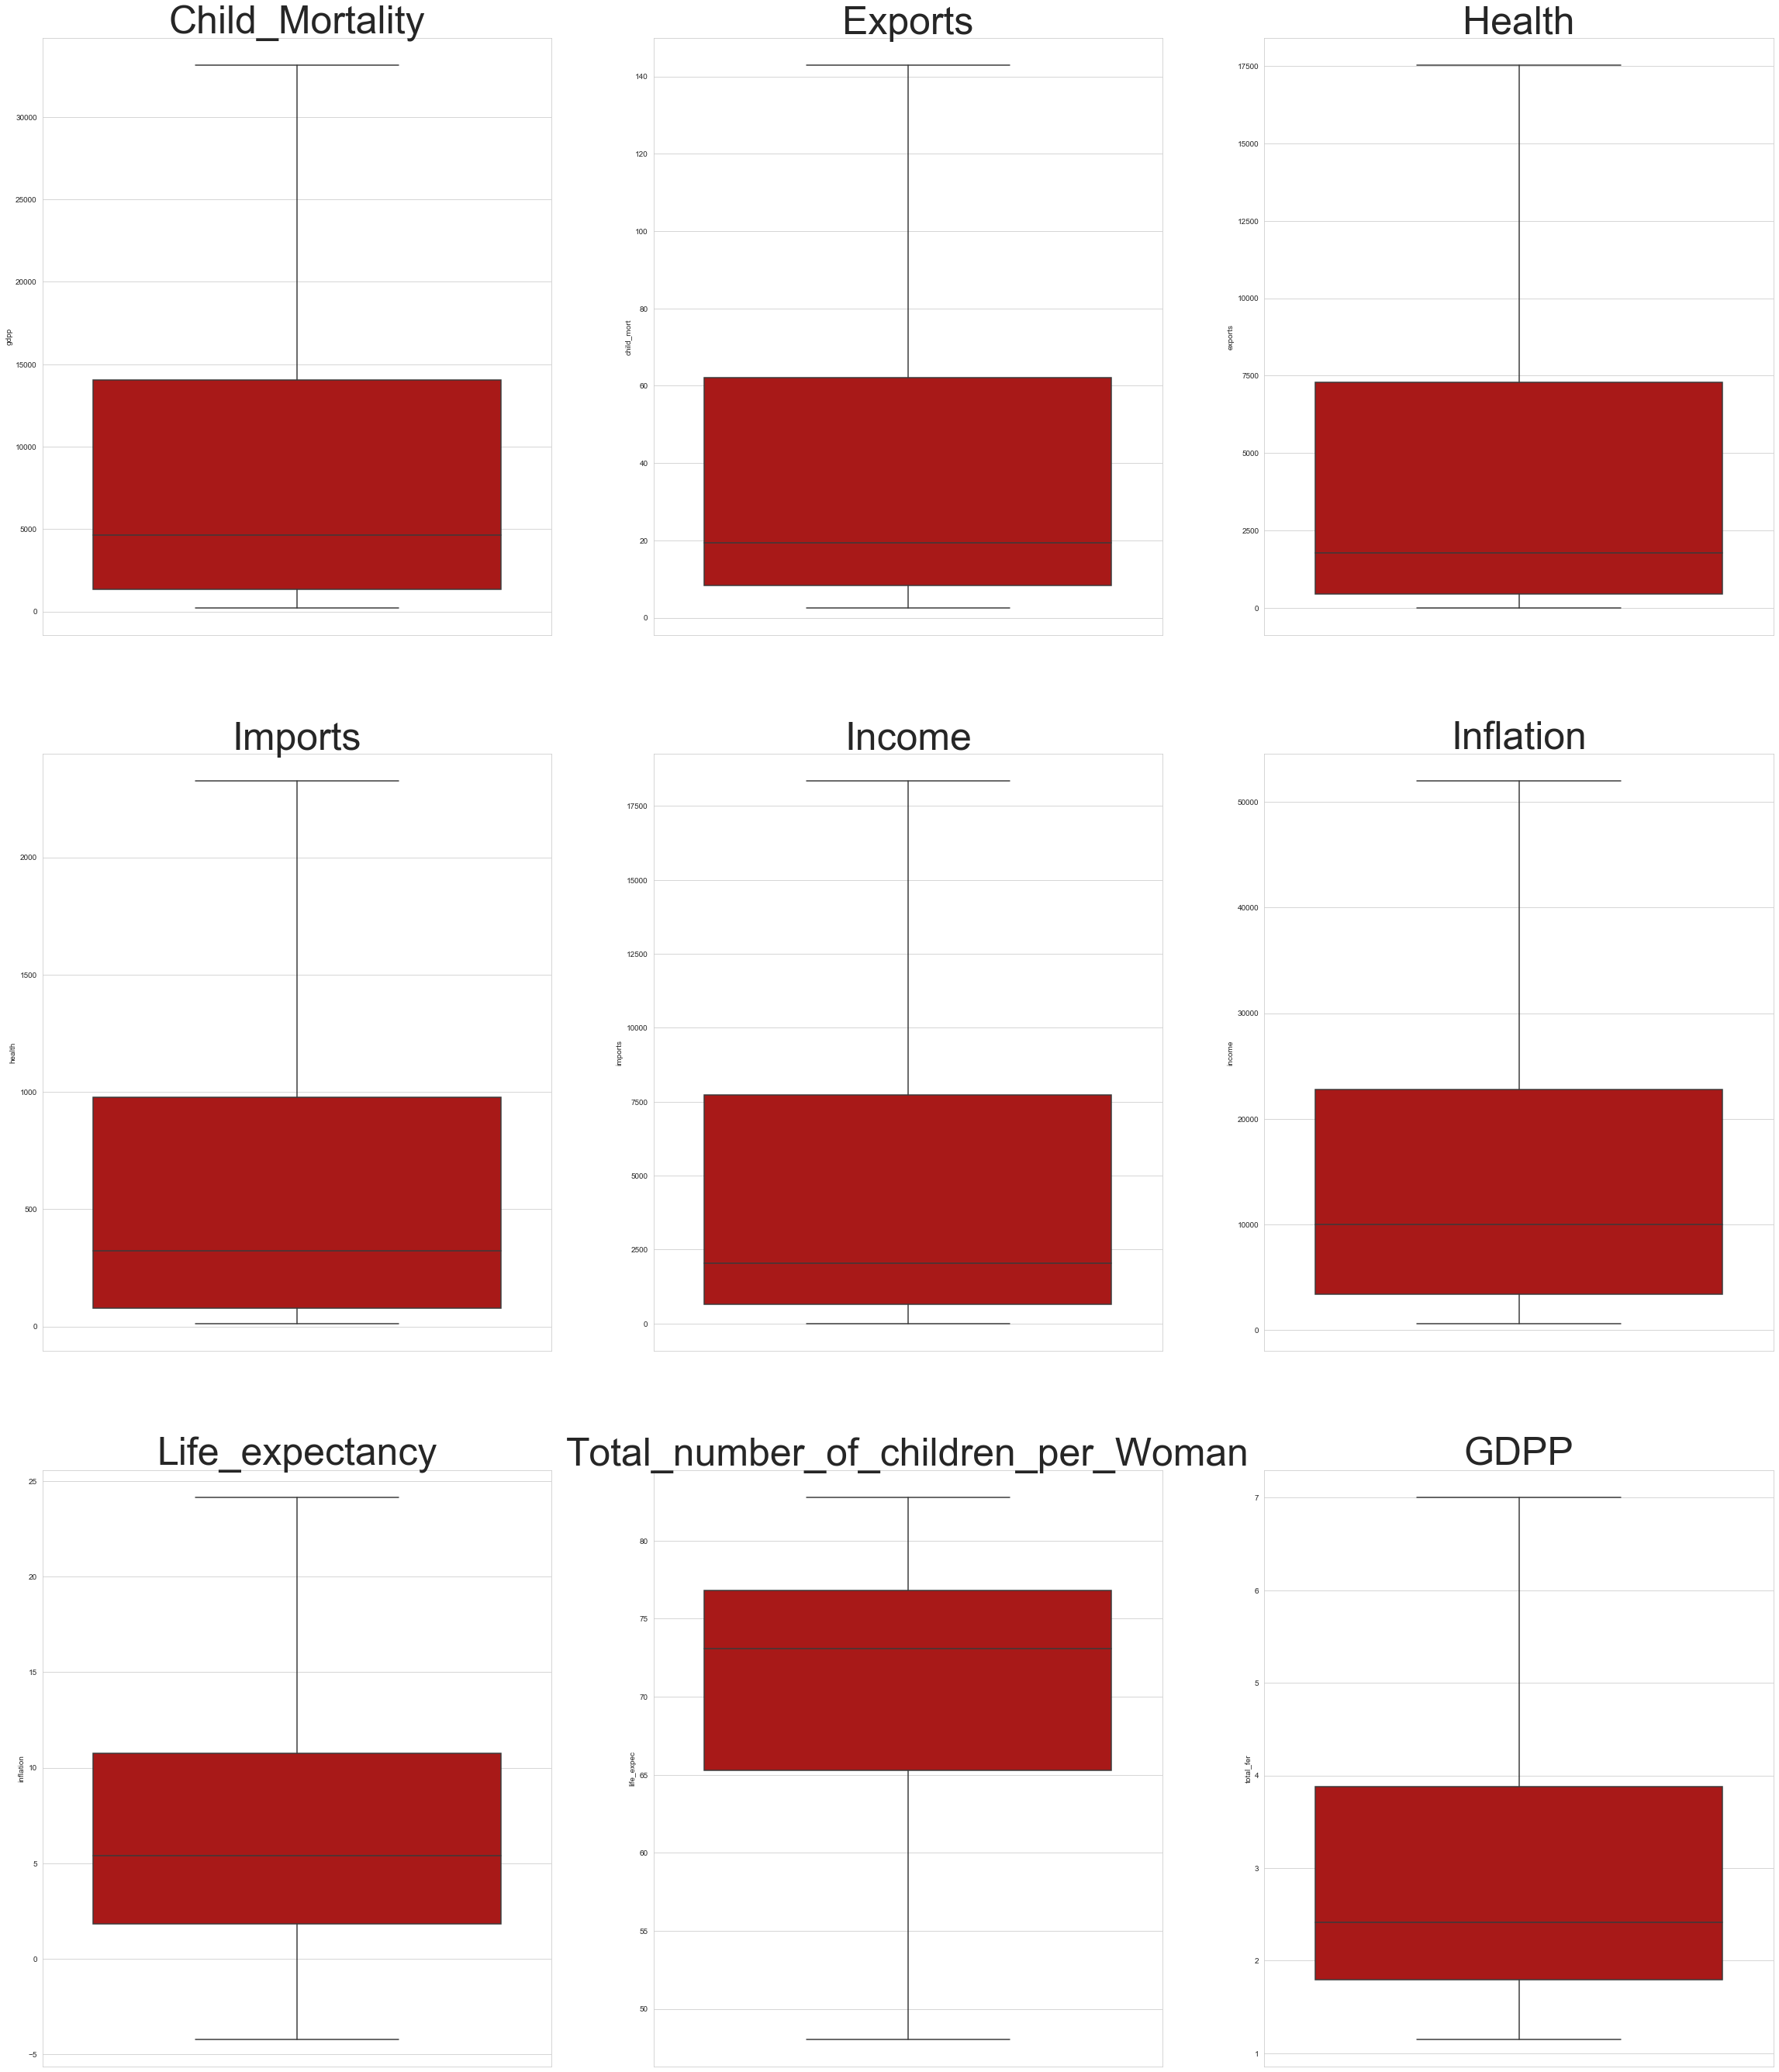

In [26]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(40,150))
plt.tight_layout()
sns.set_style('whitegrid')

# Title names for the columns in the dataset
col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}


# Visualising the outliers with boxplot for all the variables 
for i in range(9):
   plt.subplot(9,3,i+1)
   plt.title(col[i],fontsize=50)
   sns.boxplot(x=ctr_df.columns[i-1],data=ctr_df,palette='gist_heat',orient='v',fliersize=15)

## 5. Rescaling Dataset

In [27]:
# rescaling the dataset using standard scaler
scaler=StandardScaler()

df_scaled = scaler.fit_transform(ctr_df)
df_scaled = pd.DataFrame(df_scaled,columns=ctr_df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


## 6. Hopkins Check

In [28]:
# importing hopkins from sklearn and perfroming hopkins check
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [29]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.827385346707446

0.82 is a good Hopkins score. Hence the data is suitable for clustering.

## 7. K-means Clustering

### 7.1. Elbow Curve analysis

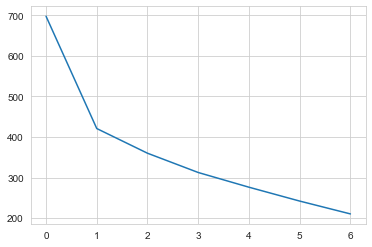

In [30]:
# elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

The elbow curve is dropping significantly till 1, i.e. 2 clusters.  

### 7.2.  Silhouette Score Analysis

In [31]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
score_list = []

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    score_list.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4980131625805177
For n_clusters=3, the silhouette score is 0.43360177139259876
For n_clusters=4, the silhouette score is 0.3095930455357734
For n_clusters=5, the silhouette score is 0.32611022128924727
For n_clusters=6, the silhouette score is 0.3016613783800461
For n_clusters=7, the silhouette score is 0.3134484542778152
For n_clusters=8, the silhouette score is 0.3196820701950583
For n_clusters=9, the silhouette score is 0.304763208260997
For n_clusters=10, the silhouette score is 0.3201376728297778
For n_clusters=11, the silhouette score is 0.31018208489087756


The silhoutte score is high for 2 clusters.

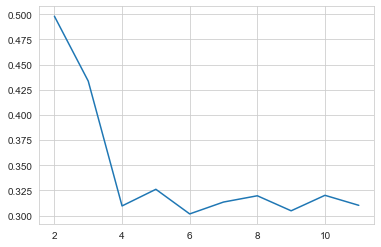

In [32]:
# ploting silhouette analysis on a line chart 
plt.plot(range_n_clusters,score_list)

### 7.3. Performing K- means Clustering

The elbow curve suggests 2 clusters will be optimum and silhoutte score is high for 2 clusters. Thus, we will be taking the value of k = 2.

In [80]:
# performing K-means by taking k=2
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
# label
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [82]:
# assign the label
ctr_df['cluster_id'] = kmeans.labels_ 

In [83]:
# Viewing dataframe after assigning labels
ctr_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


In [84]:
# counting countries in clusters
ctr_df.cluster_id.value_counts()

0    123
1     44
Name: cluster_id, dtype: int64

### 7.4. Visualising the clusters obtained

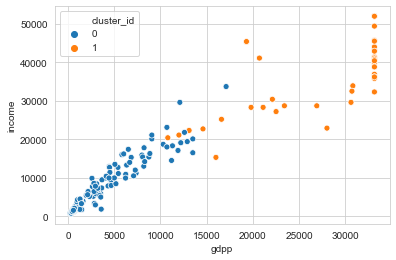

In [85]:
# visualising the clusters x='gdpp',y='income'
sns.scatterplot(x='gdpp',y='income',hue='cluster_id',legend='full',data=ctr_df)

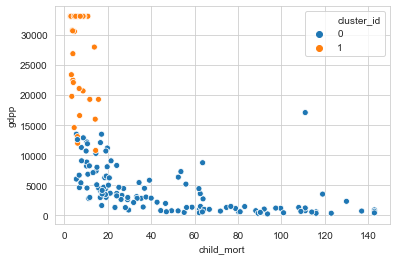

In [86]:
# visualising the clusters x='child_mort',y='gdpp'
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',data=ctr_df)

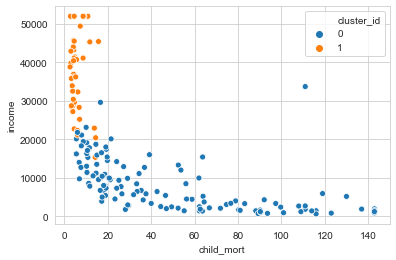

In [87]:
# visualising the clusters x='child_mort',y='income'
sns.scatterplot(x='child_mort',y='income',hue='cluster_id',legend='full',data=ctr_df)

In [88]:
# mean of colums - gdpp, income, child_mort
ctr_df.groupby('cluster_id')[['gdpp', 'income', 'child_mort']].mean()

,gdpp,income,child_mort
cluster_id,,,
0,4082.227642,8159.048780,49.017886
1,27876.136364,37621.363636,6.054545


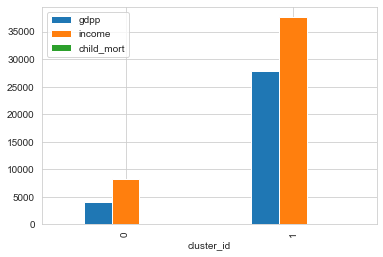

In [89]:
# visualising mean of colums - gdpp, income, child_mort
ctr_df.groupby('cluster_id')[['gdpp', 'income', 'child_mort']].mean().plot(kind = 'bar')

The above Visualization shows us that the gdpp, income and child_mort of cluster having cluster_id = 0 our very bad, while social and econmoic indicators of cluster having cluster_id = 1 are good.

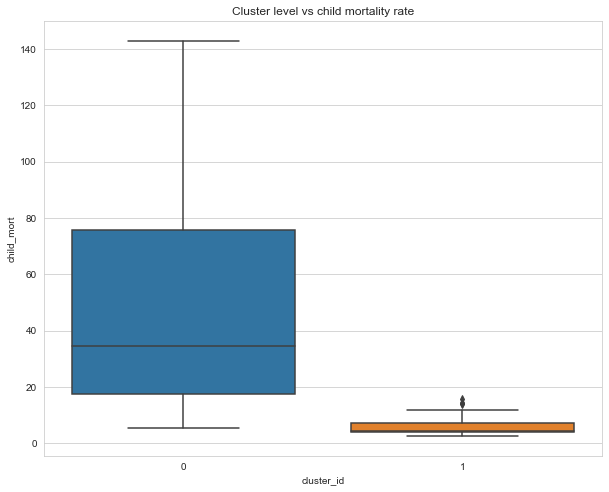

In [90]:
# Visualising the distribution of the cluster labels for column 'child_mort'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs child mortality rate')
sns.boxplot(x='cluster_id',y='child_mort',data=ctr_df)

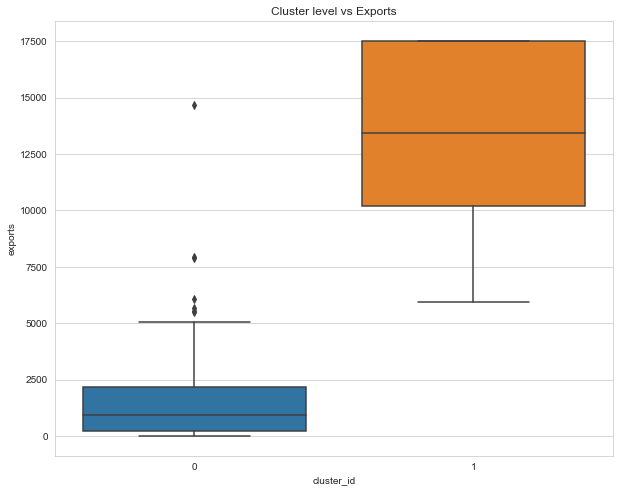

In [91]:
# Visualising the distribution of the cluster labels for column 'exports'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Exports')
sns.boxplot(x='cluster_id',y='exports',data=ctr_df)

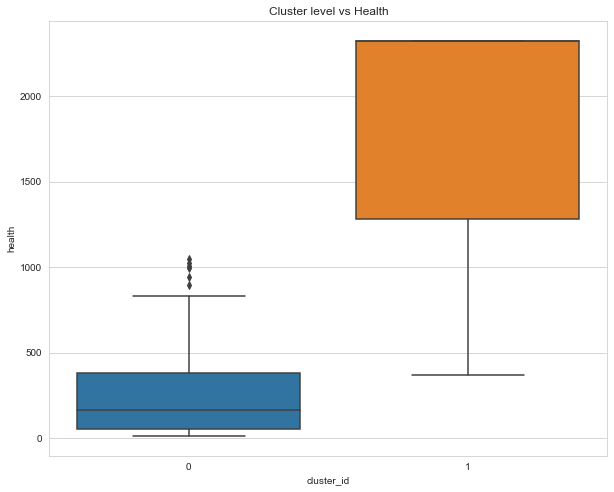

In [92]:
# Visualising the distribution of the cluster labels for column 'health'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Health')
sns.boxplot(x='cluster_id',y='health',data=ctr_df)

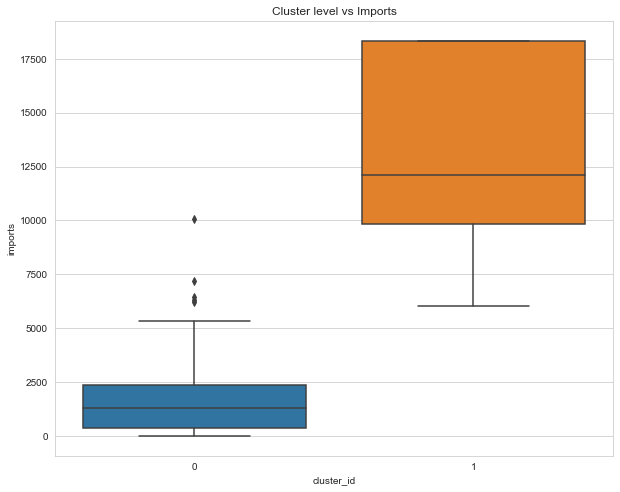

In [93]:
# Visualising the distribution of the cluster labels for column 'imports'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Imports')
sns.boxplot(x='cluster_id',y='imports',data=ctr_df)

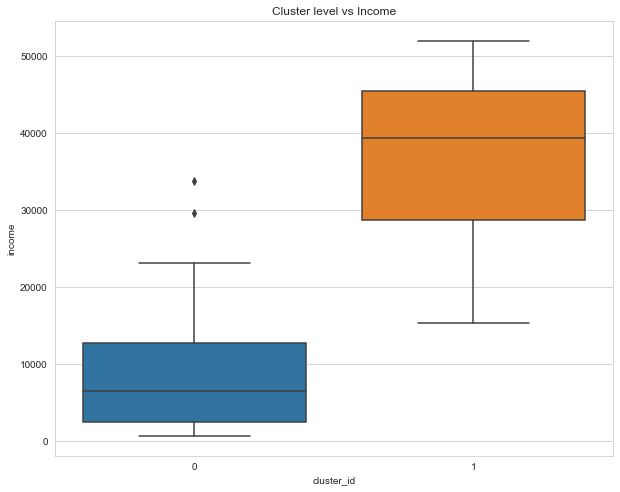

In [94]:
# Visualising the distribution of the cluster labels for column 'income'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='cluster_id',y='income',data=ctr_df)

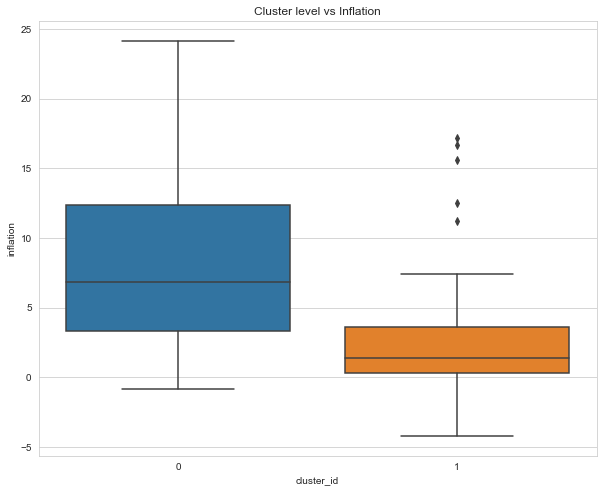

In [95]:
# Visualising the distribution of the cluster labels for column 'inflation'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Inflation')
sns.boxplot(x='cluster_id',y='inflation',data=ctr_df)

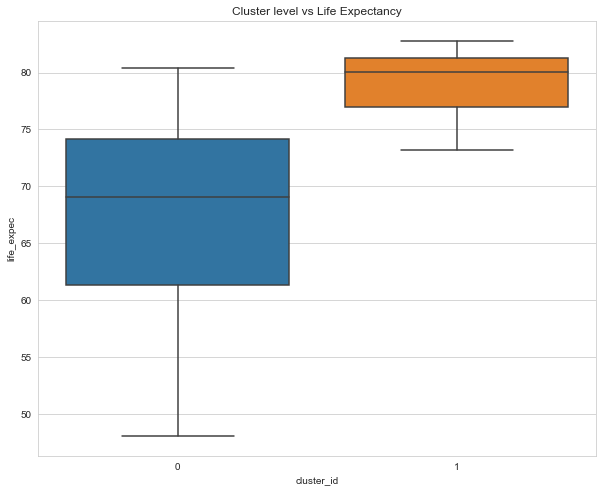

In [96]:
# Visualising the distribution of the cluster labels for column 'life_expec'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Life Expectancy')
sns.boxplot(x='cluster_id',y='life_expec',data=ctr_df)

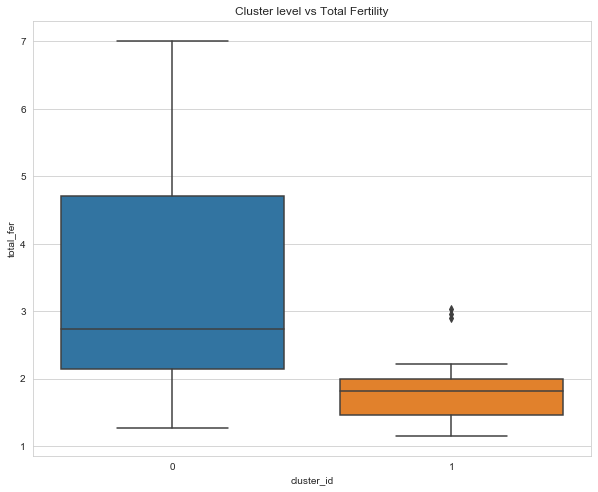

In [97]:
# Visualising the distribution of the cluster labels for column 'total_fer'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs Total Fertility')
sns.boxplot(x='cluster_id',y='total_fer',data=ctr_df)

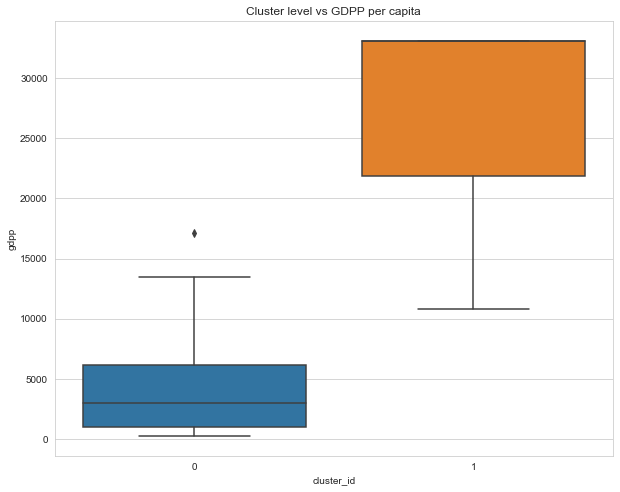

In [98]:
# Visualising the distribution of the cluster labels for column 'gdpp'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='cluster_id',y='gdpp',data=ctr_df)

All the above visualization shows us that the social and econmoic indicators of cluster having cluster_id = 0 our very bad, while social and econmoic indicators of cluster having cluster_id = 1 are better.   

### 7.5. Obtaining clusterwise list of countries

In [99]:
# countries in 1st cluster
ctr_df[ctr_df['cluster_id']==0]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,0,0
Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,24.16,75.4,2.47,13500.0,0,0
Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,0,0


The social and econmoic indicators of above countries are very bad. 

In [100]:
# countries in 2nd cluster
ctr_df[ctr_df['cluster_id']==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Australia,4.8,10276.20,2324.54675,10847.1000,41400.0,1.160,82.0,1.93,33130.0,1,1
Austria,4.3,17524.29,2324.54675,18338.6775,43200.0,0.873,80.5,1.44,33130.0,1,1
Bahamas,13.8,9800.00,2209.20000,12236.0000,22900.0,-0.393,73.8,1.86,28000.0,1,1
Bahrain,8.6,14386.50,1028.79000,10536.3000,41100.0,7.440,76.0,2.16,20700.0,1,1
Barbados,14.2,6320.00,1275.20000,7792.0000,15300.0,0.321,76.7,1.78,16000.0,1,1
Belgium,4.5,17524.29,2324.54675,18338.6775,41100.0,1.880,80.0,1.86,33130.0,1,1
Brunei,10.5,17524.29,1002.52000,9884.0000,51967.5,16.700,77.1,1.84,33130.0,1,1
Canada,5.6,13793.40,2324.54675,14694.0000,40700.0,2.870,81.3,1.63,33130.0,1,1
Cyprus,3.6,15461.60,1838.76000,17710.0000,33900.0,2.010,79.9,1.42,30800.0,1,1


The social and econmoic indicators of above countries are very good.

### 7.6.   Final list of countries obtained after performing K-means clustering

In [102]:
ctr_df.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0,0
Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0,0
"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0,0
Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,0,0
Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0


Final list of top 5 countries with lowest social and economic indicators obtained after K-means clustering. 

### 7.7. K-means Conclusion

The K-means clustering shows us that the Countries that are in direst need of aid is 123. However, as per our analysis the top 5 countries that require aid are Burundi, Liberia, Congo, Niger and Sierra Leone. These 5 countries have very lowest social and economic indicators among the countries with low social and economic indicators.

## 8. Hierarchical Clustering

In [103]:
# viewing the scaled dataset
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.369802,-0.800564,-0.795563,-0.794660,-0.943936,0.355270,-1.702225,1.915276,-0.846341
1,-0.550464,-0.613150,-0.513920,-0.488076,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
2,-0.271295,-0.515576,-0.616010,-0.591590,-0.199291,1.351551,0.686859,-0.036691,-0.508868
3,2.121210,-0.431911,-0.722418,-0.571509,-0.660984,2.293979,-1.243238,2.141784,-0.589198
4,-0.714835,0.144450,0.069070,0.428104,0.209637,-0.841463,0.722166,-0.543003,0.159686


In [104]:
# viewing the unscaled dataset
ctr_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


### 8.1. Single Linkage

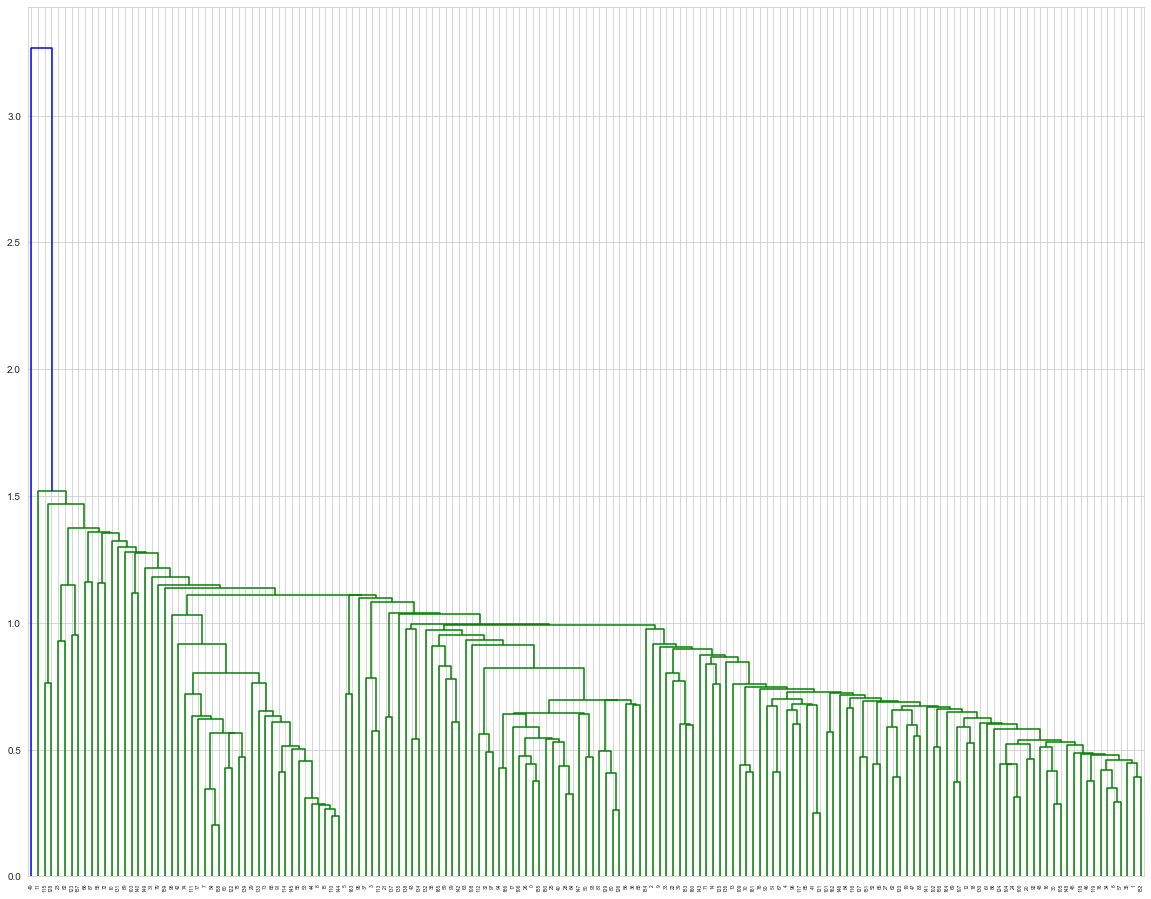

In [105]:
# single linkage
plt.figure(figsize=(20,16))
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

### 8.2. Complete Linkage

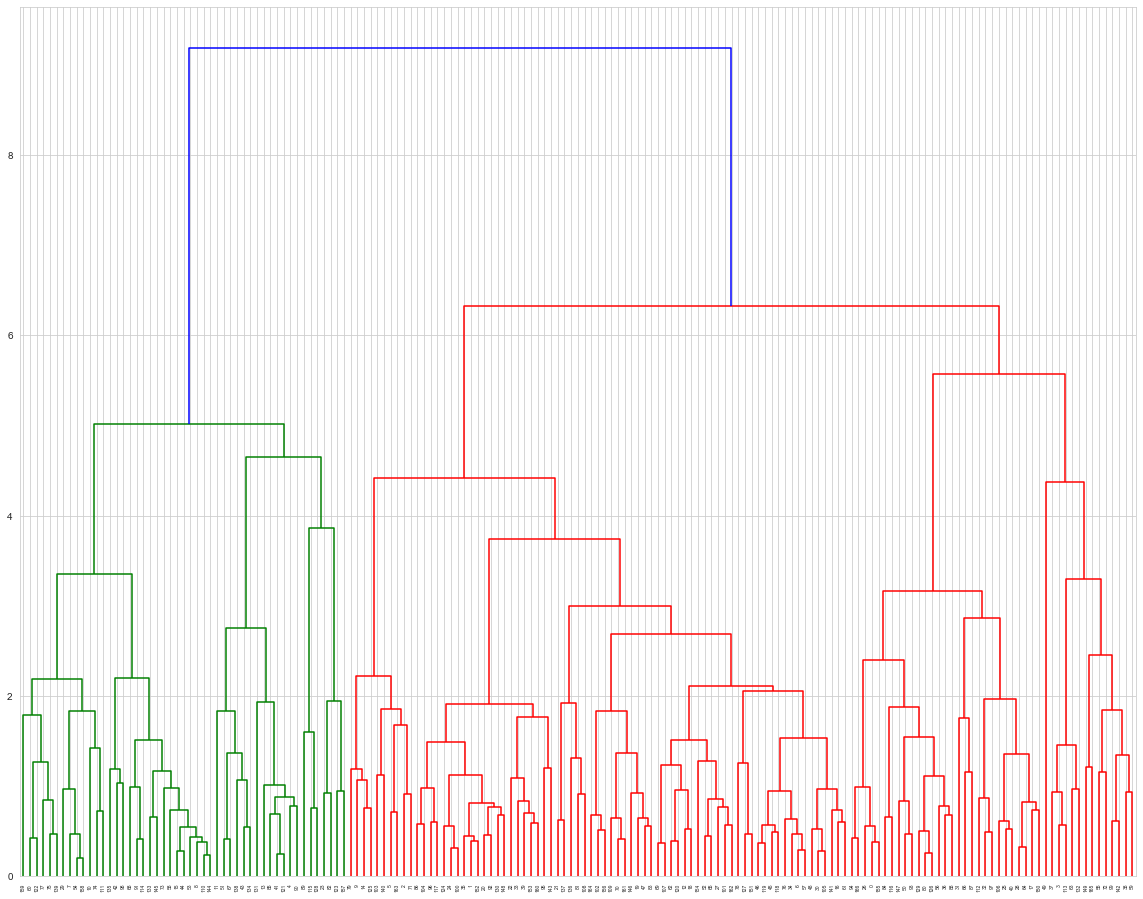

In [106]:
# complete linkage
plt.figure(figsize=(20,16))
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

The complete linkage shows us that max distance. So we cut the dendrogram into 2 clusters.

In [107]:
# cutting the dendrogram
cluster_labels = cut_tree(mergings, n_clusters=2).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

### 8.3. Assigning cluster labels

In [108]:
# assign cluster labels
ctr_df['cluster_labels'] = cluster_labels
ctr_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,1


### 8.4. Visualising clusters final list of countries obtained after performing hierarchical clustering

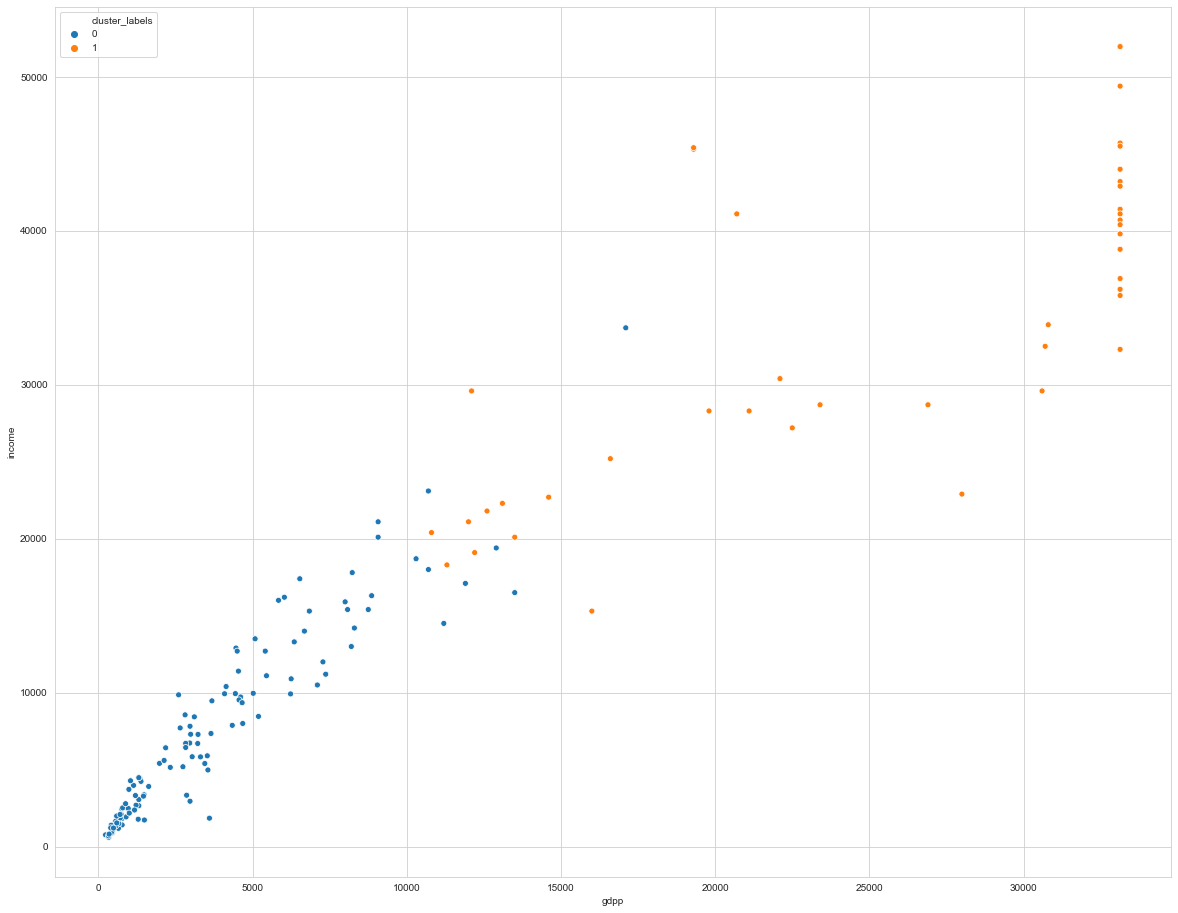

In [109]:
# visualising the clusters x='income',y='gdpp'

plt.figure(figsize=(20,16))

sns.scatterplot(x='gdpp',y='income',hue='cluster_labels',legend='full',data=ctr_df)

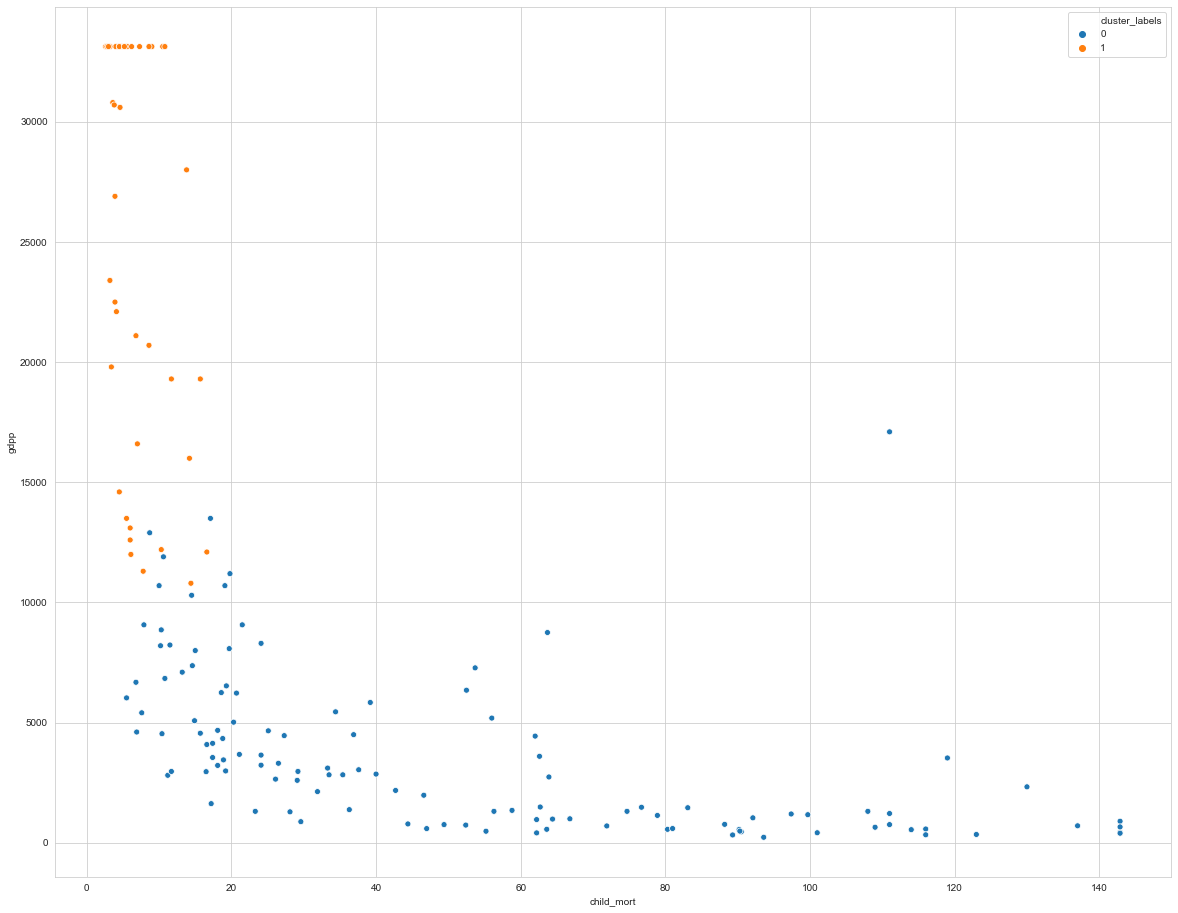

In [110]:
# visualising the clusters x='child_mort',y='gdpp'

plt.figure(figsize=(20,16))

sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',legend='full',data=ctr_df)

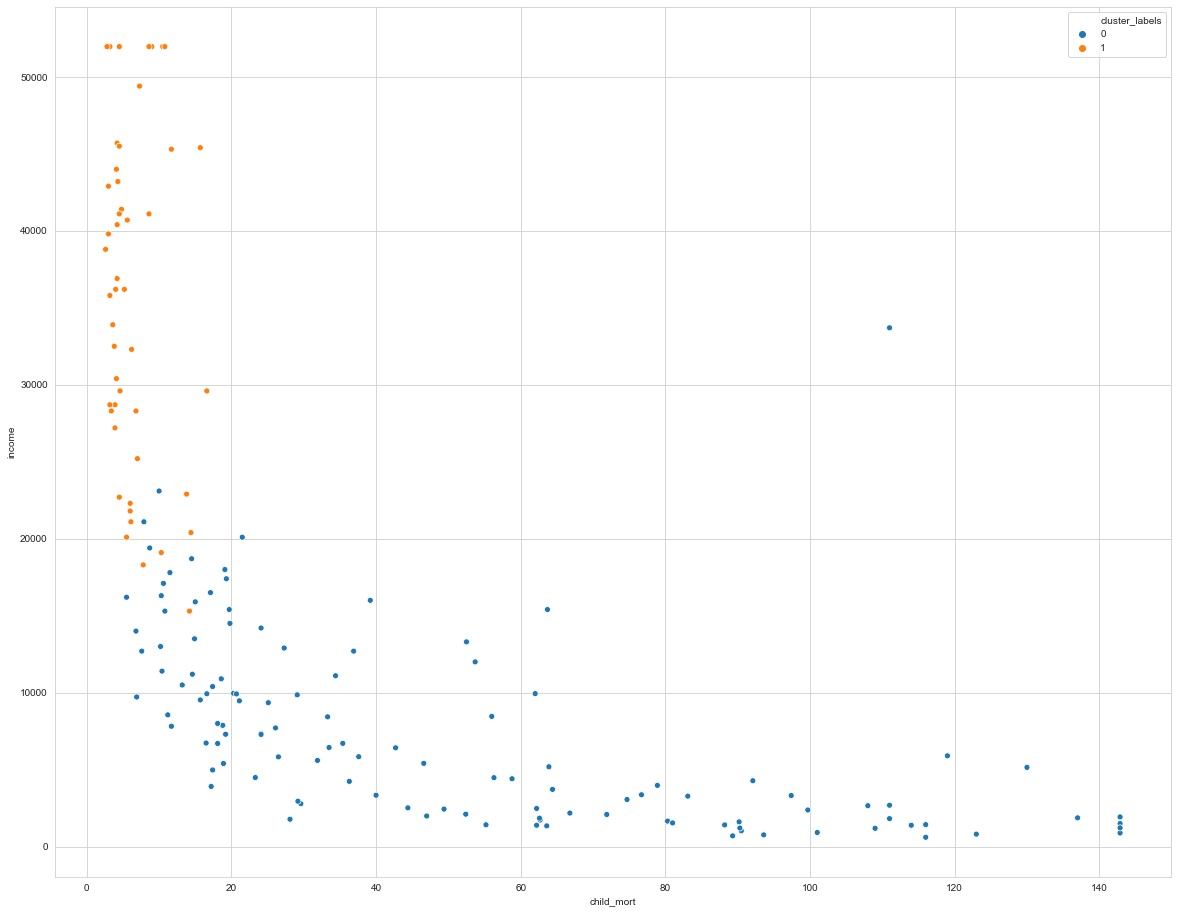

In [111]:
# visualising the clusters x='child_mort',y='income'

plt.figure(figsize=(20,16))

sns.scatterplot(x='child_mort',y='income',hue='cluster_labels',legend='full',data=ctr_df)

In [112]:
# mean of colums - gdpp, income, child_mort
ctr_df.groupby('cluster_labels')[['gdpp', 'income', 'child_mort']].mean()

,gdpp,income,child_mort
cluster_labels,,,
0,3732.322034,7581.889831,50.703390
1,26290.816327,36004.897959,6.379592


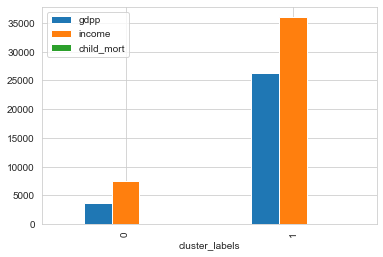

In [113]:
# visualising mean of colums - gdpp, income, child_mort
ctr_df.groupby('cluster_labels')[['gdpp', 'income', 'child_mort']].mean().plot(kind = 'bar')

The above Visualization shows us that the gdpp, income and child_mort of cluster having cluster_id = 0 our very bad, while social and econmoic indicators of cluster having cluster_id = 1 are good.

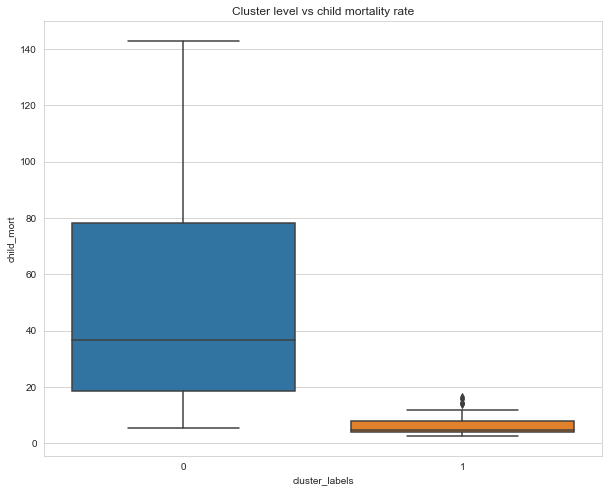

In [114]:
# Visualising the distribution of the cluster labels for column 'child_mort'
plt.figure(figsize=(10,8))
plt.title('Cluster level vs child mortality rate')
sns.boxplot(x='cluster_labels',y='child_mort',data=ctr_df)

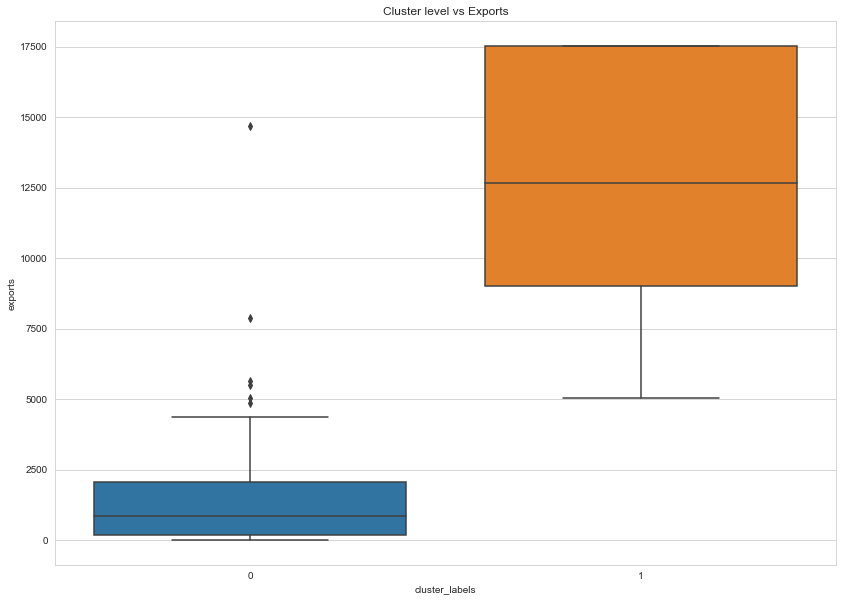

In [115]:
# Visualising the distribution of the cluster labels for column 'exports'
plt.figure(figsize=(14,10))
plt.title('Cluster level vs Exports')
sns.boxplot(x='cluster_labels',y='exports',data=ctr_df)

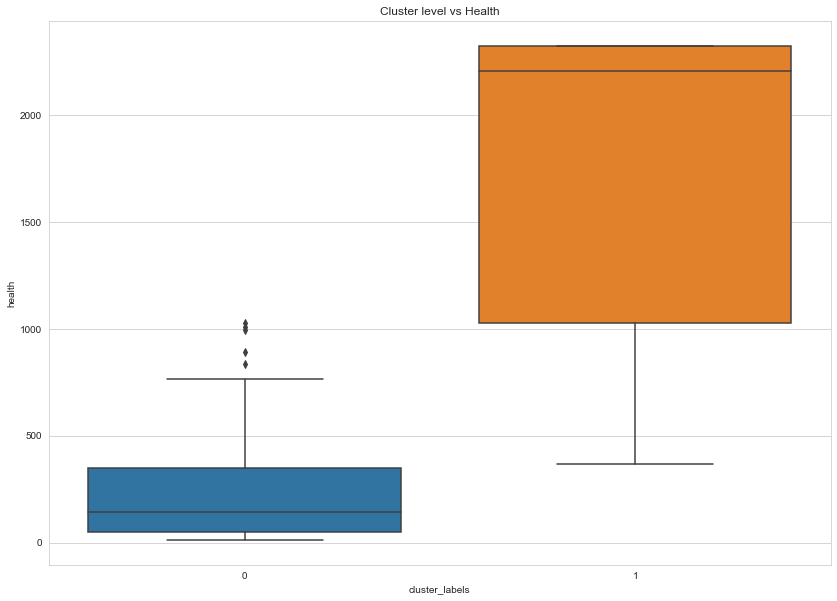

In [116]:
# Visualising the distribution of the cluster labels for column 'health'
plt.figure(figsize=(14,10))
plt.title('Cluster level vs Health')
sns.boxplot(x='cluster_labels',y='health',data=ctr_df)

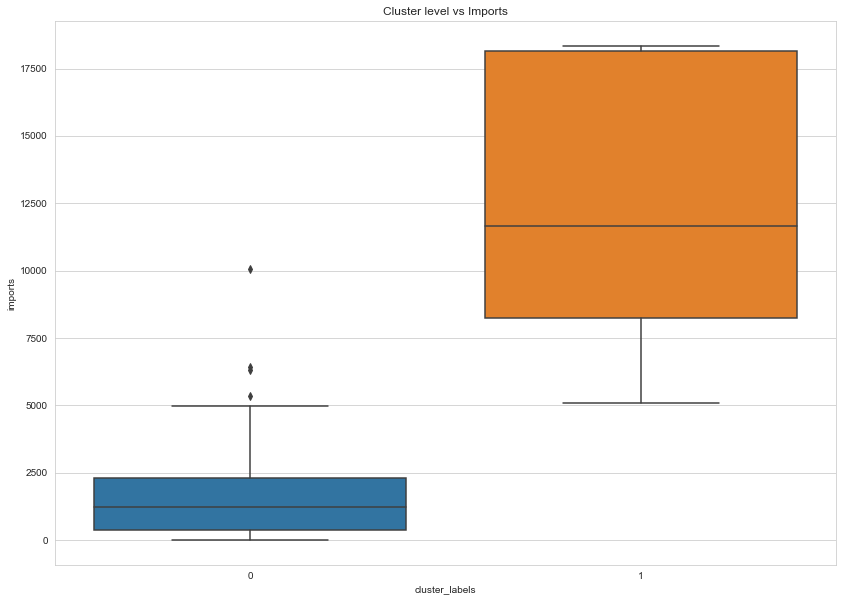

In [117]:
# Visualising the distribution of the cluster labels for column 'imports'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs Imports')
sns.boxplot(x='cluster_labels',y='imports',data=ctr_df)

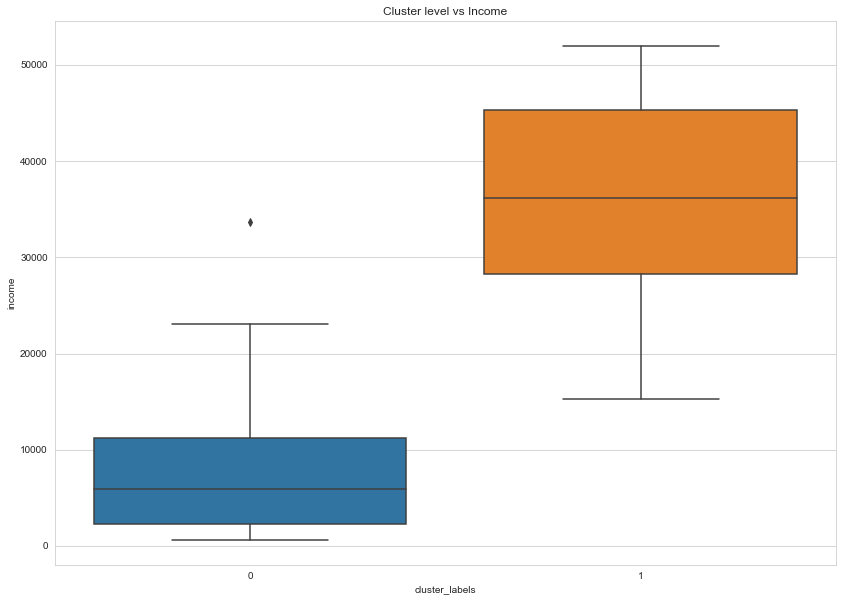

In [118]:
# Visualising the distribution of the cluster labels for column 'income'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs Income')
sns.boxplot(x='cluster_labels',y='income',data=ctr_df)

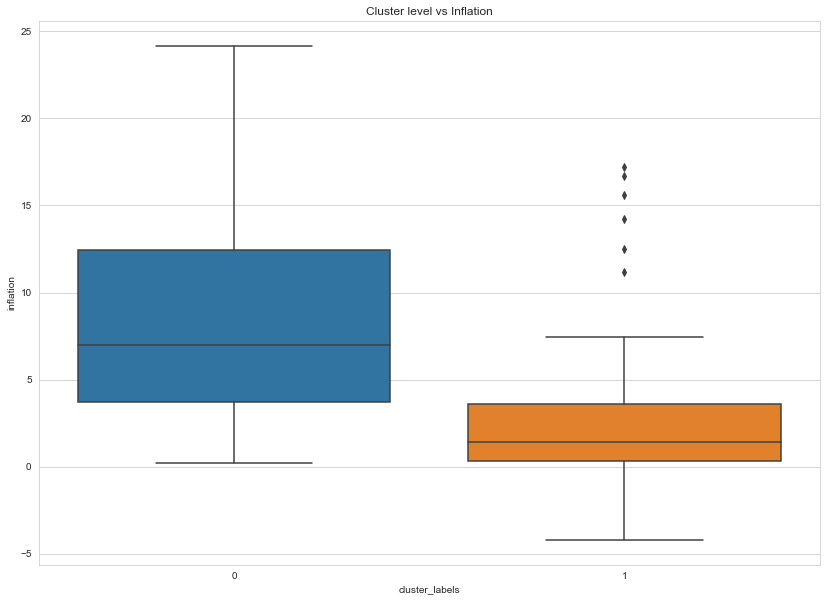

In [119]:
# Visualising the distribution of the cluster labels for column 'inflation'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs Inflation')
sns.boxplot(x='cluster_labels',y='inflation',data=ctr_df)

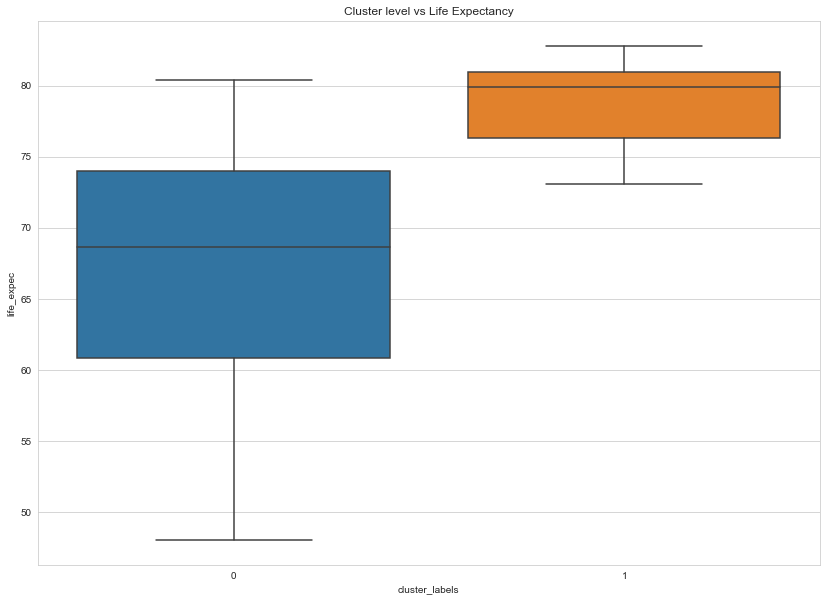

In [120]:
# Visualising the distribution of the cluster labels for column 'life_expec'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs Life Expectancy')
sns.boxplot(x='cluster_labels',y='life_expec',data=ctr_df)

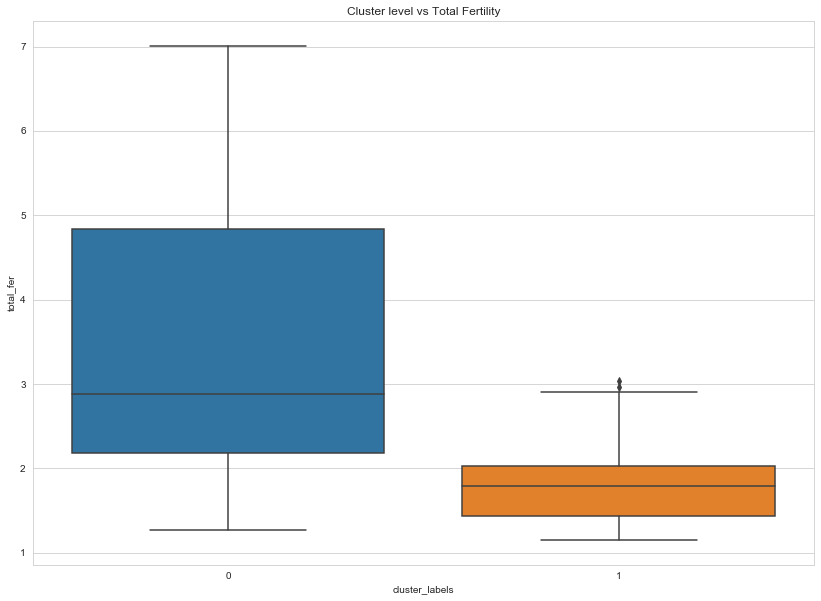

In [121]:
# Visualising the distribution of the cluster labels for column 'total_fer'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs Total Fertility')
sns.boxplot(x='cluster_labels',y='total_fer',data=ctr_df)

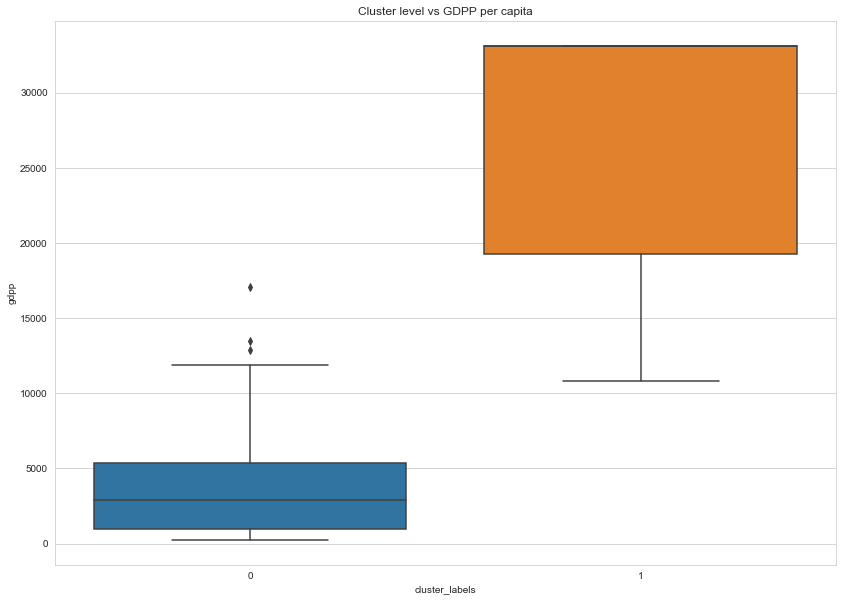

In [122]:
# Visualising the distribution of the cluster labels for column 'gdpp'

plt.figure(figsize=(14,10))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='cluster_labels',y='gdpp',data=ctr_df)

All the above visualization shows us that the social and econmoic indicators of cluster having cluster_id = 0 our very bad, while social and econmoic indicators of cluster having cluster_id = 1 are good.

### 8.5. Obtaining clusterwise list of countries

In [123]:
# countries in 1st cluster

c1 = ctr_df[ctr_df['cluster_labels']==0]
c1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.90,75.8,2.37,10300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,0,0
Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,24.16,75.4,2.47,13500.0,0,0
Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,0,0


The social and econmoic indicators of above countries are very bad.

In [124]:
# countries in 2nd cluster

ctr_df[ctr_df['cluster_labels']==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Antigua and Barbuda,10.3,5551.00,735.66000,7185.8000,19100.0,1.440,76.8,2.13,12200.0,0,1
Australia,4.8,10276.20,2324.54675,10847.1000,41400.0,1.160,82.0,1.93,33130.0,1,1
Austria,4.3,17524.29,2324.54675,18338.6775,43200.0,0.873,80.5,1.44,33130.0,1,1
Bahamas,13.8,9800.00,2209.20000,12236.0000,22900.0,-0.393,73.8,1.86,28000.0,1,1
Bahrain,8.6,14386.50,1028.79000,10536.3000,41100.0,7.440,76.0,2.16,20700.0,1,1
Barbados,14.2,6320.00,1275.20000,7792.0000,15300.0,0.321,76.7,1.78,16000.0,1,1
Belgium,4.5,17524.29,2324.54675,18338.6775,41100.0,1.880,80.0,1.86,33130.0,1,1
Brunei,10.5,17524.29,1002.52000,9884.0000,51967.5,16.700,77.1,1.84,33130.0,1,1
Canada,5.6,13793.40,2324.54675,14694.0000,40700.0,2.870,81.3,1.63,33130.0,1,1


The social and econmoic indicators of above countries are very good.

### 8.6. Final list of countries obtained after performing hierarchical clustering

In [126]:
# final list of top 10 countries that require countries which are in direst need of aid  
ctr_df.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Burundi,93.600,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,0,0
Liberia,89.300,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,0,0
"Congo, Dem. Rep.",116.000,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,0,0
Niger,123.000,77.2560,17.9568,170.868,814.0,2.55,58.8,7.0075,348.0,0,0
Sierra Leone,142.875,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0,0


Final list of top 5 countries with lowest social and economic indicators obtained after hierarchial clustering.

### 8.7 Hierarchical Clustering Conclusion

The hierarchal clustering shows us that the Countries that are in direst need of aid is 118. However, as per our analysis the top 5 countries that require aid are Burundi, Liberia, Congo, Niger and Sierra Leone. These 5 countries have very lowest social and economic indicators among the countries with low social and economic indicators.

## 9. Final Conclusion

Both the clustering suggests same top 5 countries that require aid. Thus, we draw conclusion that **Burundi, Liberia, Congo, Niger and Sierra Leone** are top 5 countries that require AID from HELP International.